In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import os

In [2]:
os.getcwd()

'c:\\Users\\HP\\Desktop\\Deep Learning with Prajwal'

In [3]:
# Load Data Set 
os.chdir('C:\\Users\\HP\\Downloads\\Batch 93 Day38\\')

In [4]:
os.getcwd()

'C:\\Users\\HP\\Downloads\\Batch 93 Day38'

In [5]:
df=pd.read_csv('monthly-milk-production.csv')
df

,Month,Milk Production
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0
...,...,...
163,1975-08-01,858.0
164,1975-09-01,817.0
165,1975-10-01,827.0
166,1975-11-01,797.0


In [6]:
# Check Datatypes of columns

df.dtypes

Month               object
Milk Production    float64
dtype: object

In [7]:
# Convert Month to Date Time Data Type

df['Month']=pd.to_datetime(df['Month'])
print(df.dtypes)
print(df)

Month              datetime64[ns]
Milk Production           float64
dtype: object
         Month  Milk Production
0   1962-01-01            589.0
1   1962-02-01            561.0
2   1962-03-01            640.0
3   1962-04-01            656.0
4   1962-05-01            727.0
..         ...              ...
163 1975-08-01            858.0
164 1975-09-01            817.0
165 1975-10-01            827.0
166 1975-11-01            797.0
167 1975-12-01            843.0

[168 rows x 2 columns]


In [8]:
display(df)

,Month,Milk Production
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0
...,...,...
163,1975-08-01,858.0
164,1975-09-01,817.0
165,1975-10-01,827.0
166,1975-11-01,797.0


In [9]:
df.dtypes

Month              datetime64[ns]
Milk Production           float64
dtype: object

In [10]:
# Convert Month to Index

df.set_index('Month',inplace=True)
print(df)

            Milk Production
Month                      
1962-01-01            589.0
1962-02-01            561.0
1962-03-01            640.0
1962-04-01            656.0
1962-05-01            727.0
...                     ...
1975-08-01            858.0
1975-09-01            817.0
1975-10-01            827.0
1975-11-01            797.0
1975-12-01            843.0

[168 rows x 1 columns]


In [11]:
display(df)

,Milk Production
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0
...,...
1975-08-01,858.0
1975-09-01,817.0
1975-10-01,827.0


In [12]:
# Inpute Data - Data Type

type(df['Milk Production']['1962-01-01':'1962-04-01'])

pandas.core.series.Series

In [13]:
# Extract Element from Data Frame

print('Single Row',df['Milk Production']['1962-01-01'])

Single Row 589.0


In [14]:
print(df['Milk Production']['1962-01-01'])

589.0


In [15]:
print('Single Row:',df['Milk Production']['1962-01-01'])
print('\n Multiple Row:\n')
print(df['Milk Production']['1962-01-01':'1962-04-01'])

Single Row: 589.0

 Multiple Row:

Month
1962-01-01    589.0
1962-02-01    561.0
1962-03-01    640.0
1962-04-01    656.0
Name: Milk Production, dtype: float64


In [16]:
# View the details Counts ,Mean and STD etc......

print(df.describe())

       Milk Production
count       168.000000
mean        754.708333
std         102.204524
min         553.000000
25%         677.750000
50%         761.000000
75%         824.500000
max         969.000000


In [17]:
display(df)

,Milk Production
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0
...,...
1975-08-01,858.0
1975-09-01,817.0
1975-10-01,827.0


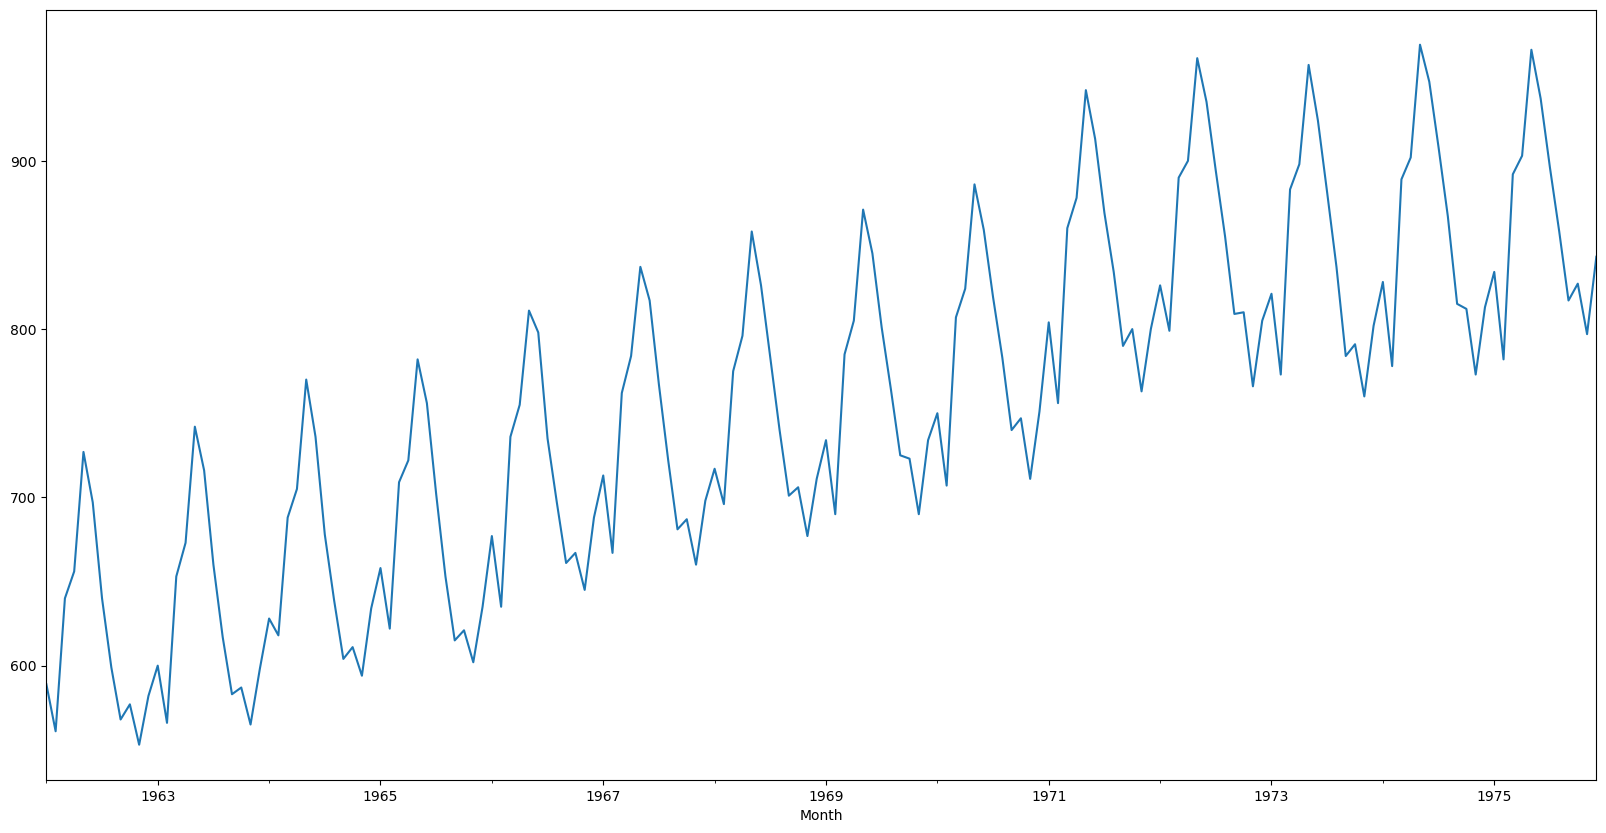

In [18]:
# Plot Graph

df['Milk Production'].plot(figsize=(20,10))
plt.show()

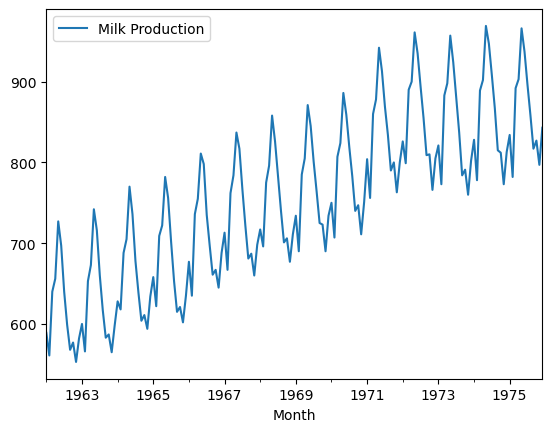

In [19]:
''' OR '''

df.plot()
plt.show()

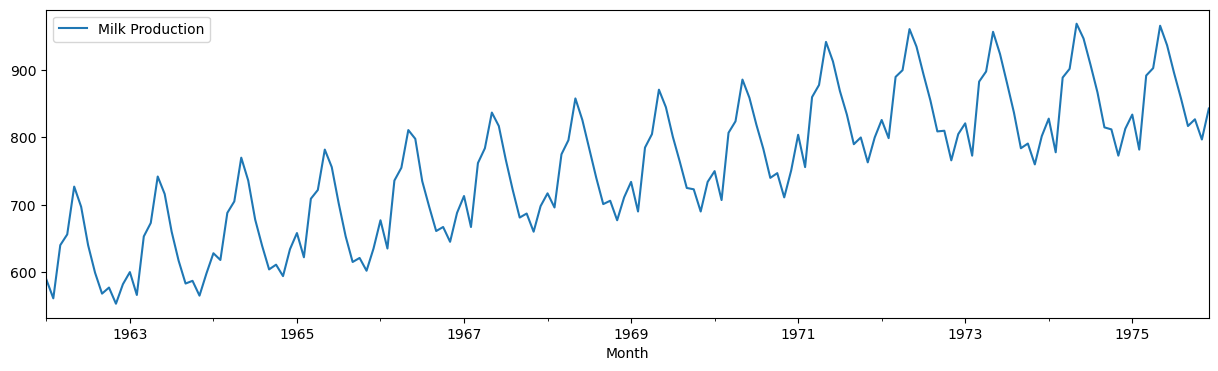

In [20]:
# Bigger view of the graph tounderstand pattern
df.plot(figsize=(15,4))
plt.show()

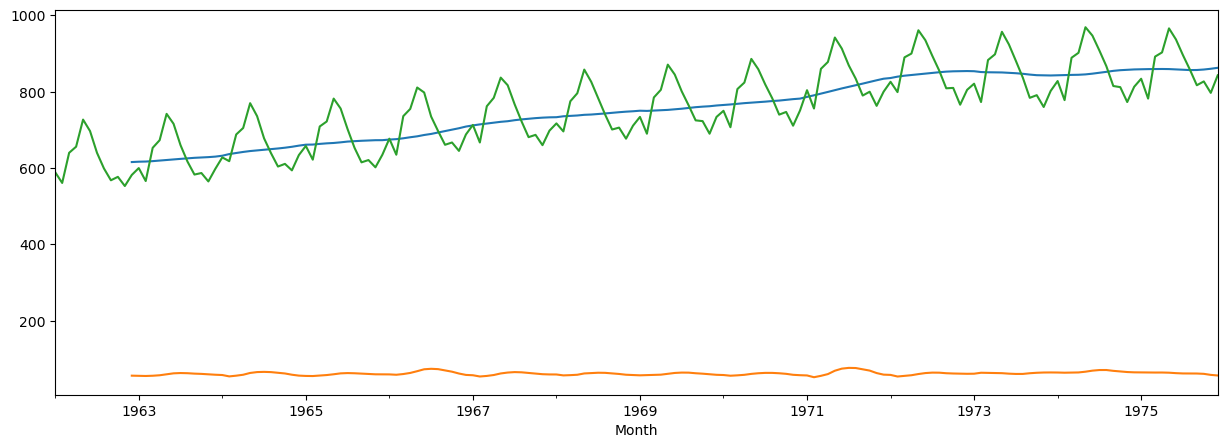

In [21]:
# Moving Average 12 Months, Standard Deviation and Original Data Set

df['Milk Production'].rolling(12).mean().plot(figsize=(15,5))
df['Milk Production'].rolling(12).std().plot()
df['Milk Production'].plot()
plt.show()

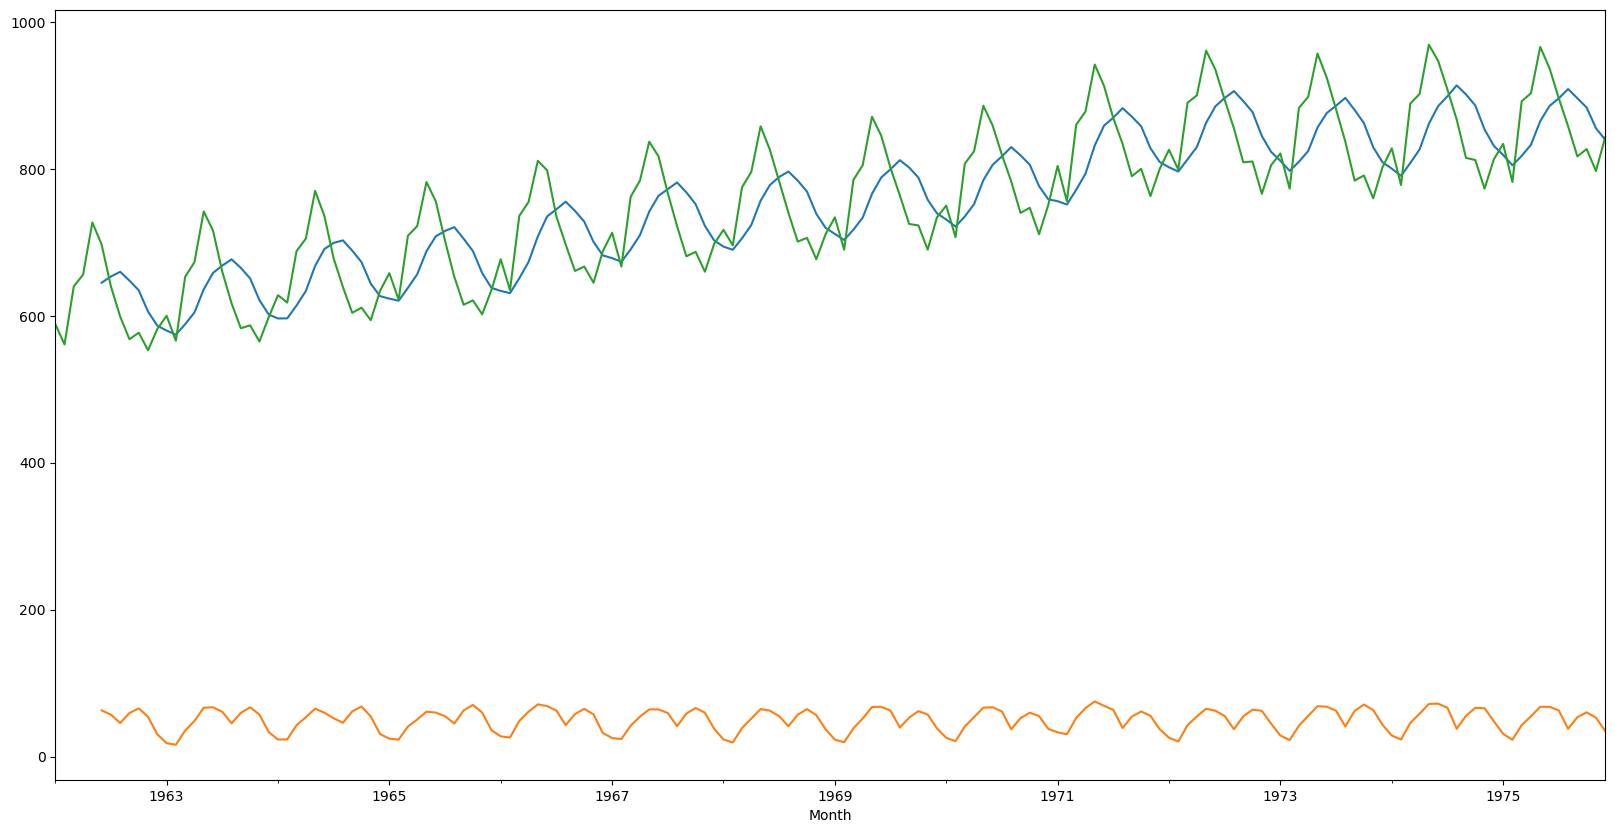

In [22]:
# Update the Rolling month to 6 months might ot get proper view

df['Milk Production'].rolling(6).mean().plot(figsize=(20,10))
df['Milk Production'].rolling(6).std().plot()
df['Milk Production'].plot()
plt.show()

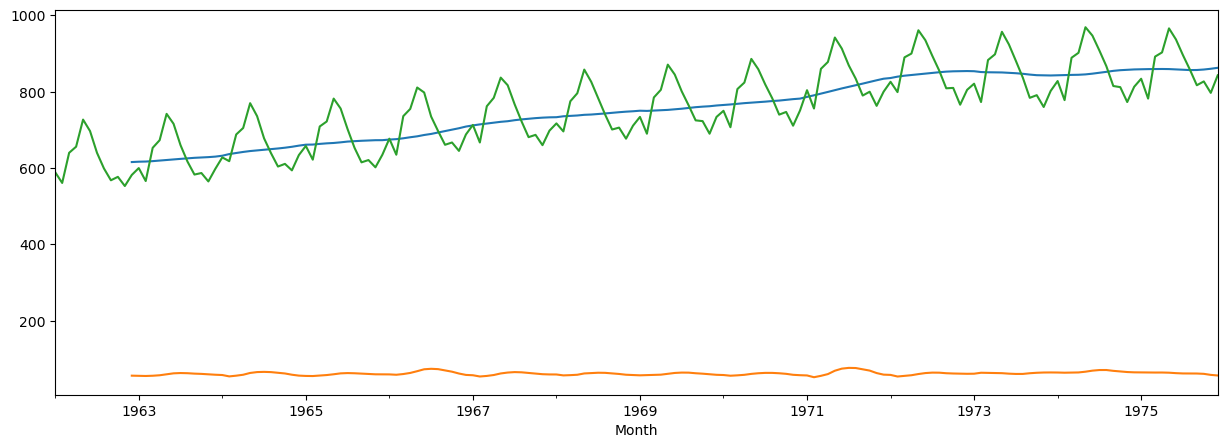

In [23]:
df['Milk Production'].rolling(12).mean().plot(figsize=(15,5))
df['Milk Production'].rolling(12).std().plot()
df['Milk Production'].plot()
plt.show()

<Figure size 2000x1000 with 0 Axes>

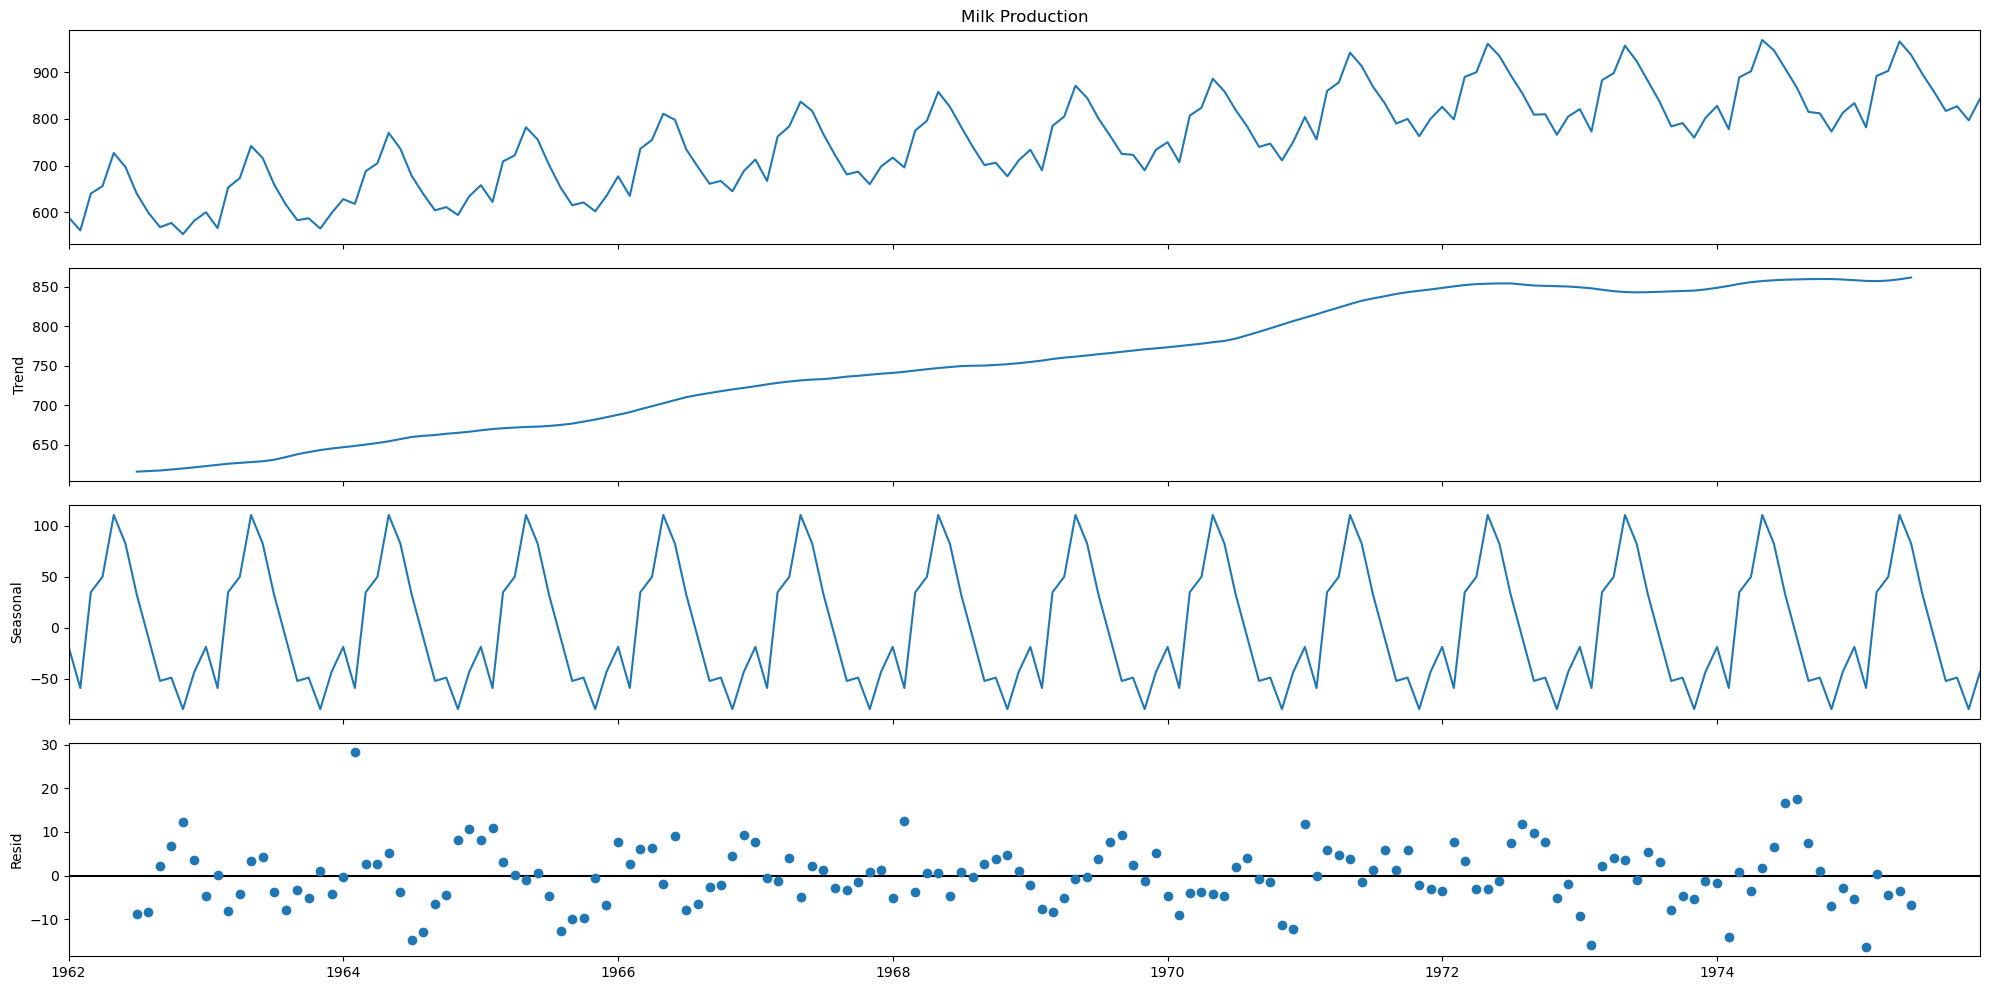

In [24]:
# Create Trend , Cyclic ,Seasonal, lr reguler Component from Data Set Residual - lr reguler

from matplotlib.pyplot import rcParams
rcParams['figure.figsize']=20,10
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(df['Milk Production'],period=12)
fig=plt.figure()
fig=decomposition.plot()
plt.show()


In [25]:
# Run Augmented Dickey Fuller test to check if the data is stationary (d Value)

from statsmodels.tsa.stattools import adfuller
result=adfuller(df['Milk Production'])
display(result) 

(-1.303811587422123,
 0.6274267086030346,
 13,
 154,
 {'1%': -3.473542528196209,
  '5%': -2.880497674144038,
  '10%': -2.576878053634677},
 1115.1730447395112)

In [26]:
'''Highlighted 2nd value is P value ,which is > 0.05,ie time series is not stationary'''

'Highlighted 2nd value is P value ,which is > 0.05,ie time series is not stationary'

In [31]:
# Display the result of Dickey Fuller test through Function

def adf_check(time_series):
    from statsmodels.tsa.stattools import adfuller
    result=adfuller(time_series)
    print('Augmented Dickey Fuller Test')
    labels=['ADF Test Statistics','P Value','Number of Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+str(value))
    if result [1] < 0.05:
        print('Time series is Stationary') 
    else:
        print('Time series is not stationary')      

In [32]:
# Call Fuction
adf_check(df['Milk Production'])

Augmented Dickey Fuller Test
ADF Test Statistics-1.303811587422123
P Value0.6274267086030346
Number of Lags Used13
Number of Observations154
Time series is not stationary


In [34]:
df['Milk Production'].shift(1)

Month
1962-01-01      NaN
1962-02-01    589.0
1962-03-01    561.0
1962-04-01    640.0
1962-05-01    656.0
              ...  
1975-08-01    896.0
1975-09-01    858.0
1975-10-01    817.0
1975-11-01    827.0
1975-12-01    797.0
Name: Milk Production, Length: 168, dtype: float64

In [33]:
# Differencing to make time series Stationary - Shift(1)

df['Milk_First_Difference']=df['Milk Production']-df['Milk Production'].shift(1)
df['Milk_First_Difference']
display(df)

,Milk Production,Milk_First_Difference
Month,,
1962-01-01,589.0,NaN
1962-02-01,561.0,-28.0
1962-03-01,640.0,79.0
1962-04-01,656.0,16.0
1962-05-01,727.0,71.0
...,...,...
1975-08-01,858.0,-38.0
1975-09-01,817.0,-41.0
1975-10-01,827.0,10.0


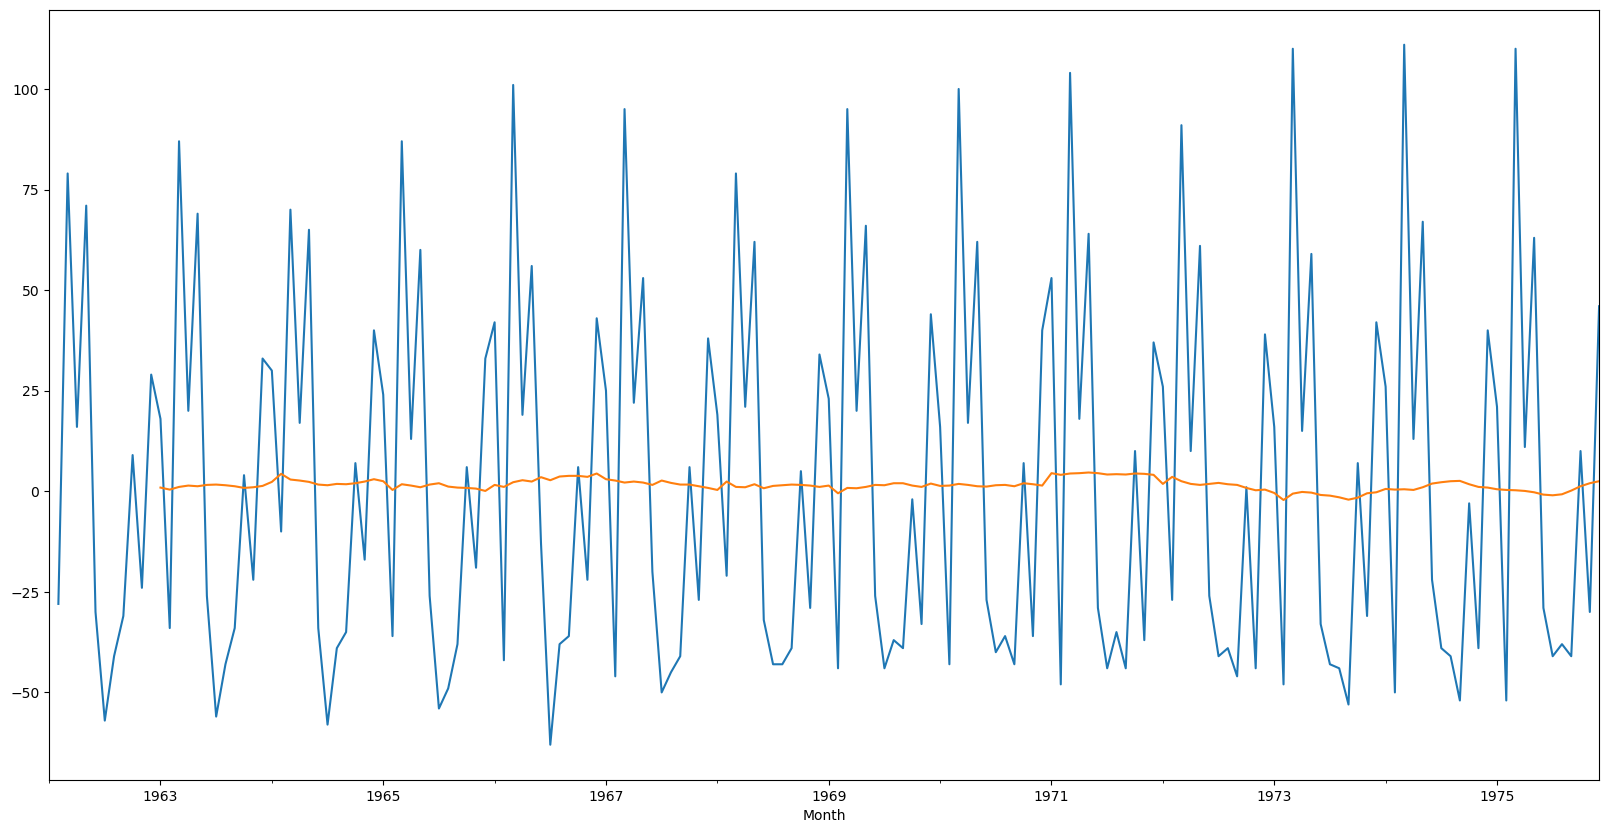

In [36]:
# Plot the Graph

df['Milk_First_Difference'].plot(figsize=(20,10))
df['Milk_First_Difference'].rolling(12).mean().plot()
plt.show()

<Figure size 2000x1000 with 0 Axes>

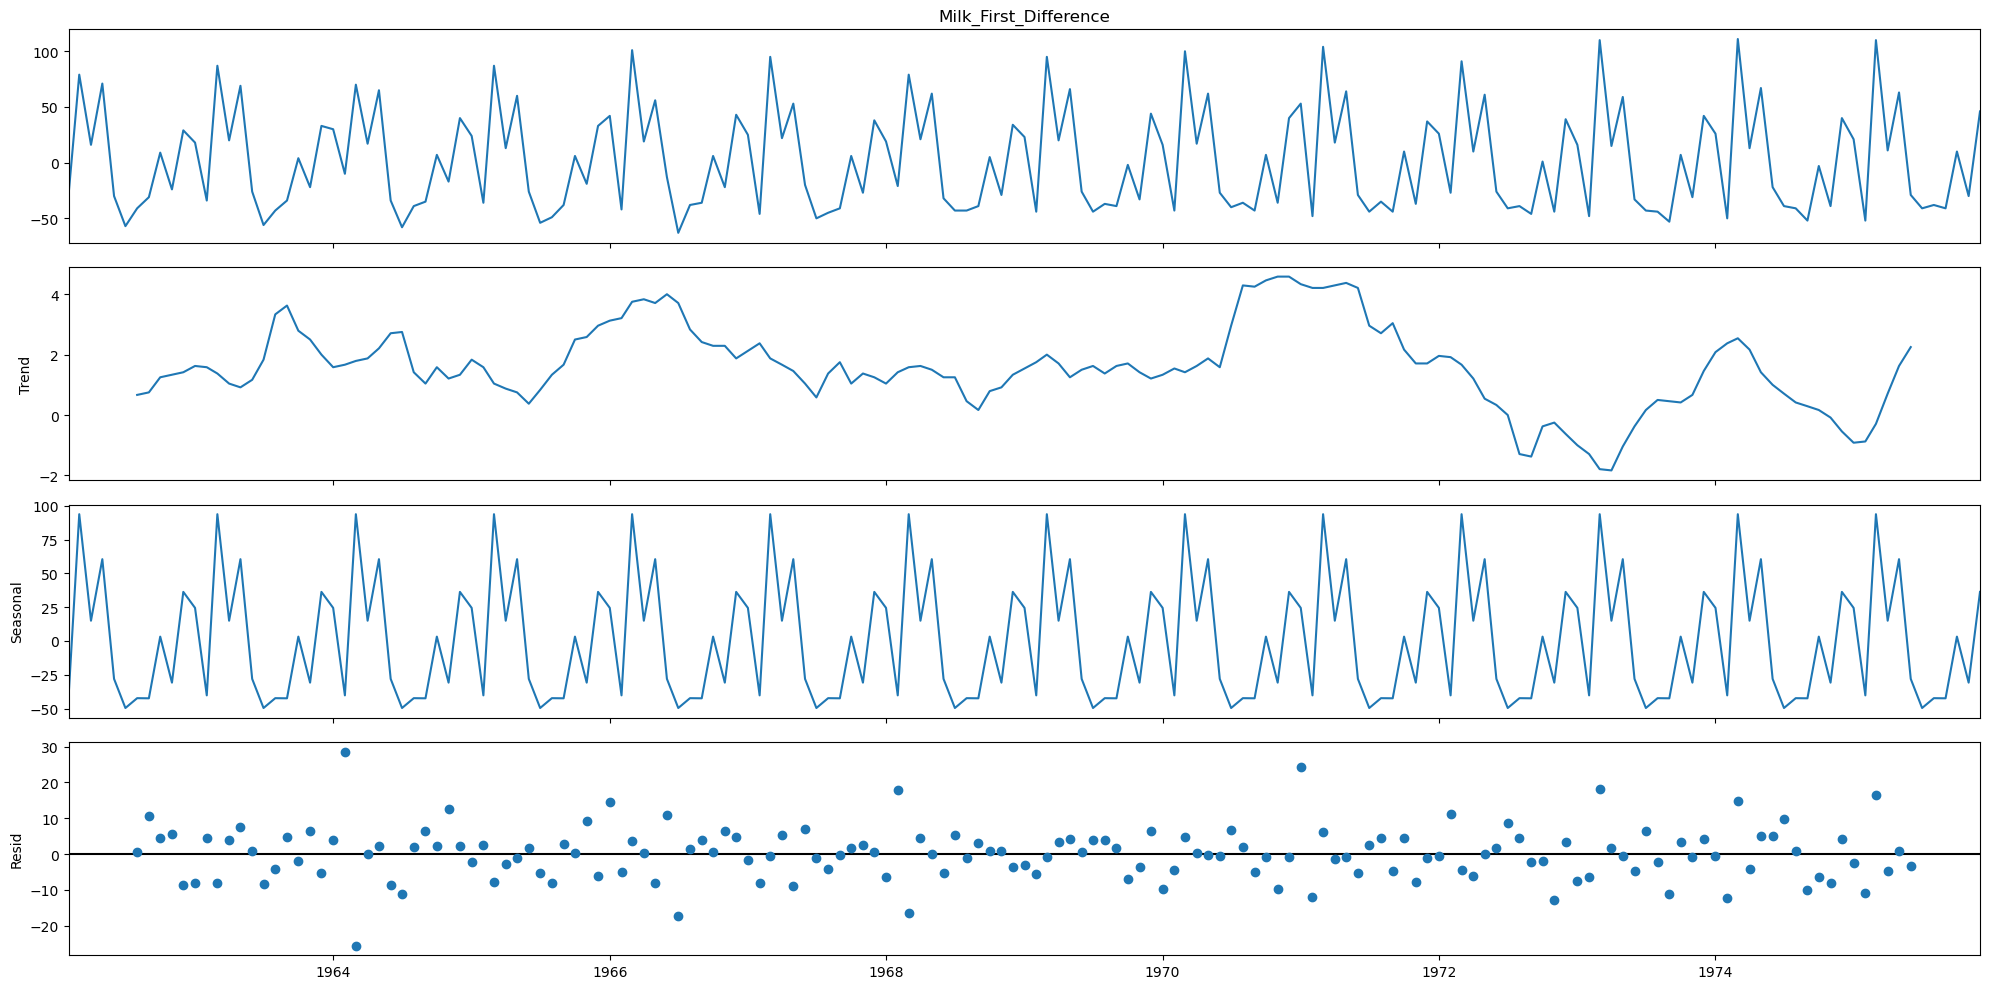

In [37]:
# Decompose Graph to check rend and seasonality of 'Milk_First_Difference

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(df['Milk_First_Difference'].dropna(),period=12)
fig=plt.figure()
fig=decomposition.plot()
plt.show()

In [38]:
df

,Milk Production,Milk_First_Difference
Month,,
1962-01-01,589.0,NaN
1962-02-01,561.0,-28.0
1962-03-01,640.0,79.0
1962-04-01,656.0,16.0
1962-05-01,727.0,71.0
...,...,...
1975-08-01,858.0,-38.0
1975-09-01,817.0,-41.0
1975-10-01,827.0,10.0


In [ ]:
'''Without dropna()'''

In [39]:
# check with ADF Test - dropna to delete first row since value is NaN

adf_check(df['Milk_First_Difference'].dropna())

Augmented Dickey Fuller Test
ADF Test Statistics-3.0549955586530695
P Value0.030068004001785647
Number of Lags Used14
Number of Observations152
Time series is Stationary


In [40]:
df

,Milk Production,Milk_First_Difference
Month,,
1962-01-01,589.0,NaN
1962-02-01,561.0,-28.0
1962-03-01,640.0,79.0
1962-04-01,656.0,16.0
1962-05-01,727.0,71.0
...,...,...
1975-08-01,858.0,-38.0
1975-09-01,817.0,-41.0
1975-10-01,827.0,10.0


In [41]:
# Seasonal Difference

df['Milk_Seasonal_Difference']=df['Milk Production']-df['Milk Production'].shift(12)
display(df['Milk_Seasonal_Difference'])

Month
1962-01-01     NaN
1962-02-01     NaN
1962-03-01     NaN
1962-04-01     NaN
1962-05-01     NaN
              ... 
1975-08-01    -9.0
1975-09-01     2.0
1975-10-01    15.0
1975-11-01    24.0
1975-12-01    30.0
Name: Milk_Seasonal_Difference, Length: 168, dtype: float64

In [43]:
df.head(50)

,Milk Production,Milk_First_Difference,Milk_Seasonal_Difference
Month,,,
1962-01-01,589.0,NaN,NaN
1962-02-01,561.0,-28.0,NaN
1962-03-01,640.0,79.0,NaN
1962-04-01,656.0,16.0,NaN
1962-05-01,727.0,71.0,NaN
1962-06-01,697.0,-30.0,NaN
1962-07-01,640.0,-57.0,NaN
1962-08-01,599.0,-41.0,NaN
1962-09-01,568.0,-31.0,NaN


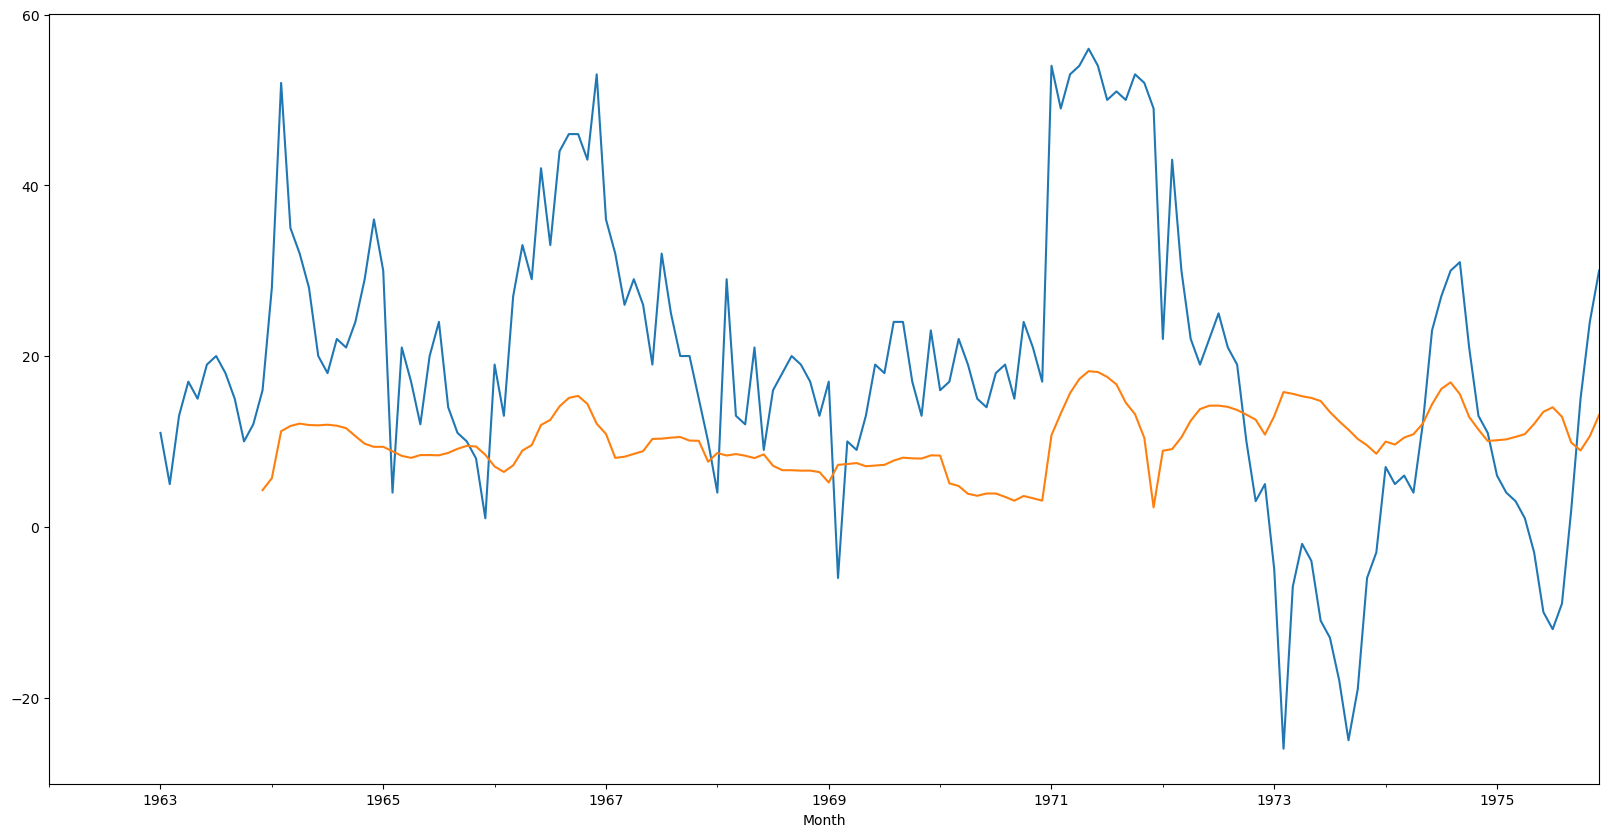

In [47]:
# Seasonal difference Plot Graph

df['Milk_Seasonal_Difference'].plot(figsize=(20,10))
df['Milk_Seasonal_Difference'].rolling(12).std().plot()
plt.show()

In [48]:
# Check with ADF Test - Seasonality Stationary -Dropna to Drop NaN]

adf_check(df['Milk_Seasonal_Difference'].dropna())

Augmented Dickey Fuller Test
ADF Test Statistics-2.3354193143593966
P Value0.16079880527711388
Number of Lags Used12
Number of Observations143
Time series is not stationary


In [51]:
# Seasonality is not stationary, Take Saesonality First Difference

df['Milk_Seasonal_First_Difference']=df['Milk_Seasonal_Difference']-df['Milk_Seasonal_Difference'].shift(12)
display(df['Milk_Seasonal_First_Difference'])

Month
1962-01-01     NaN
1962-02-01     NaN
1962-03-01     NaN
1962-04-01     NaN
1962-05-01     NaN
              ... 
1975-08-01   -87.0
1975-09-01   -85.0
1975-10-01   -46.0
1975-11-01    -8.0
1975-12-01     5.0
Name: Milk_Seasonal_First_Difference, Length: 168, dtype: float64

In [53]:
df.head(50)

,Milk Production,Milk_First_Difference,Milk_Seasonal_Difference,Milk_Seasonal_First_Difference
Month,,,,
1962-01-01,589.0,NaN,NaN,NaN
1962-02-01,561.0,-28.0,NaN,NaN
1962-03-01,640.0,79.0,NaN,NaN
1962-04-01,656.0,16.0,NaN,NaN
1962-05-01,727.0,71.0,NaN,NaN
1962-06-01,697.0,-30.0,NaN,NaN
1962-07-01,640.0,-57.0,NaN,NaN
1962-08-01,599.0,-41.0,NaN,NaN
1962-09-01,568.0,-31.0,NaN,NaN


In [54]:
# ADF Check to, Check Stationary

adf_check(df['Milk_Seasonal_First_Difference'].dropna())

Augmented Dickey Fuller Test
ADF Test Statistics-2.926846361134854
P Value0.04231401519178798
Number of Lags Used12
Number of Observations119
Time series is Stationary


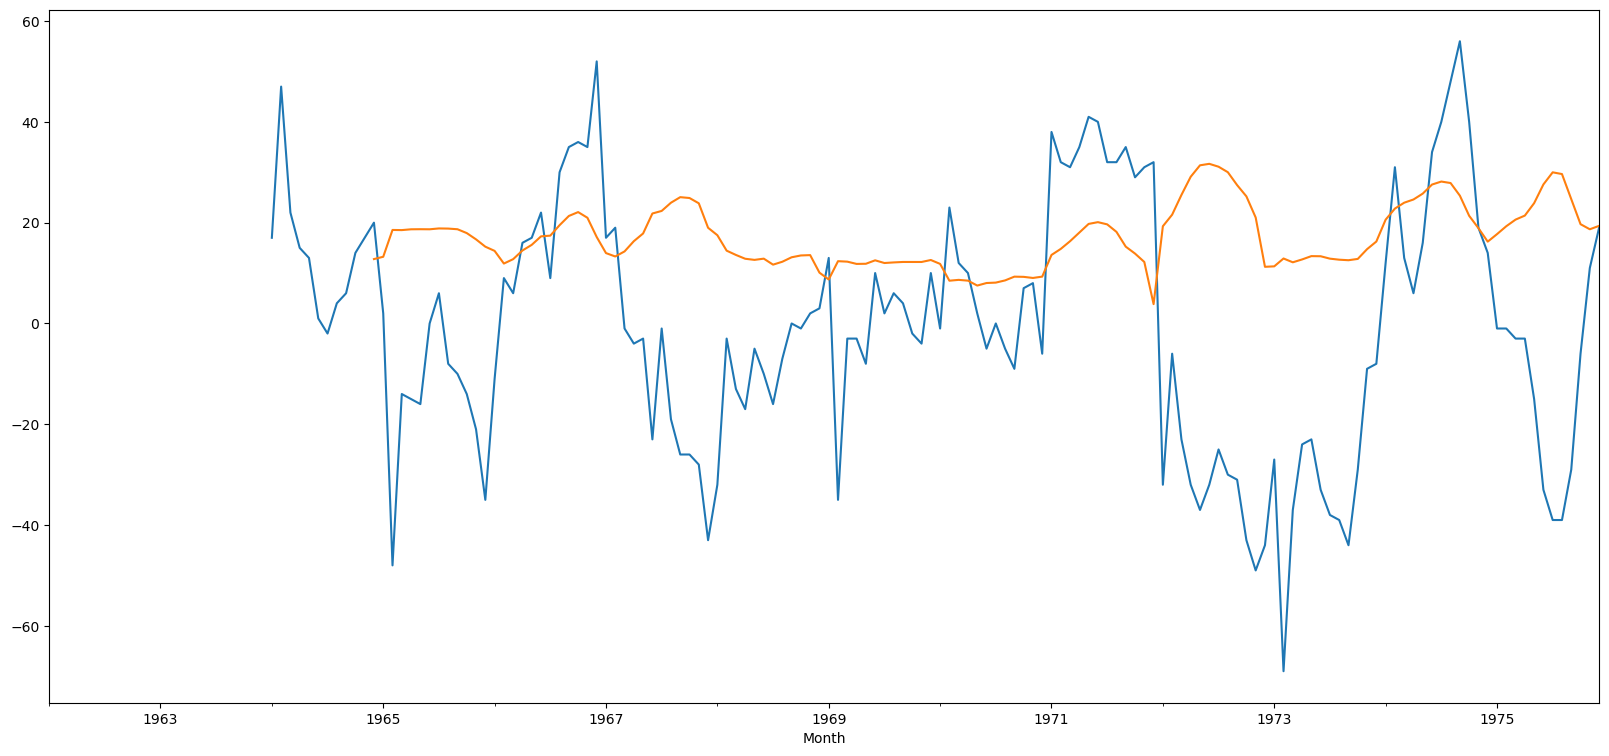

In [56]:
# Plot Graph

df['Milk_Seasonal_Difference'].plot(figsize=(20,9))
df['Milk_Seasonal_Difference'].rolling(12).std().plot()
plt.show()

<Figure size 2000x1000 with 0 Axes>

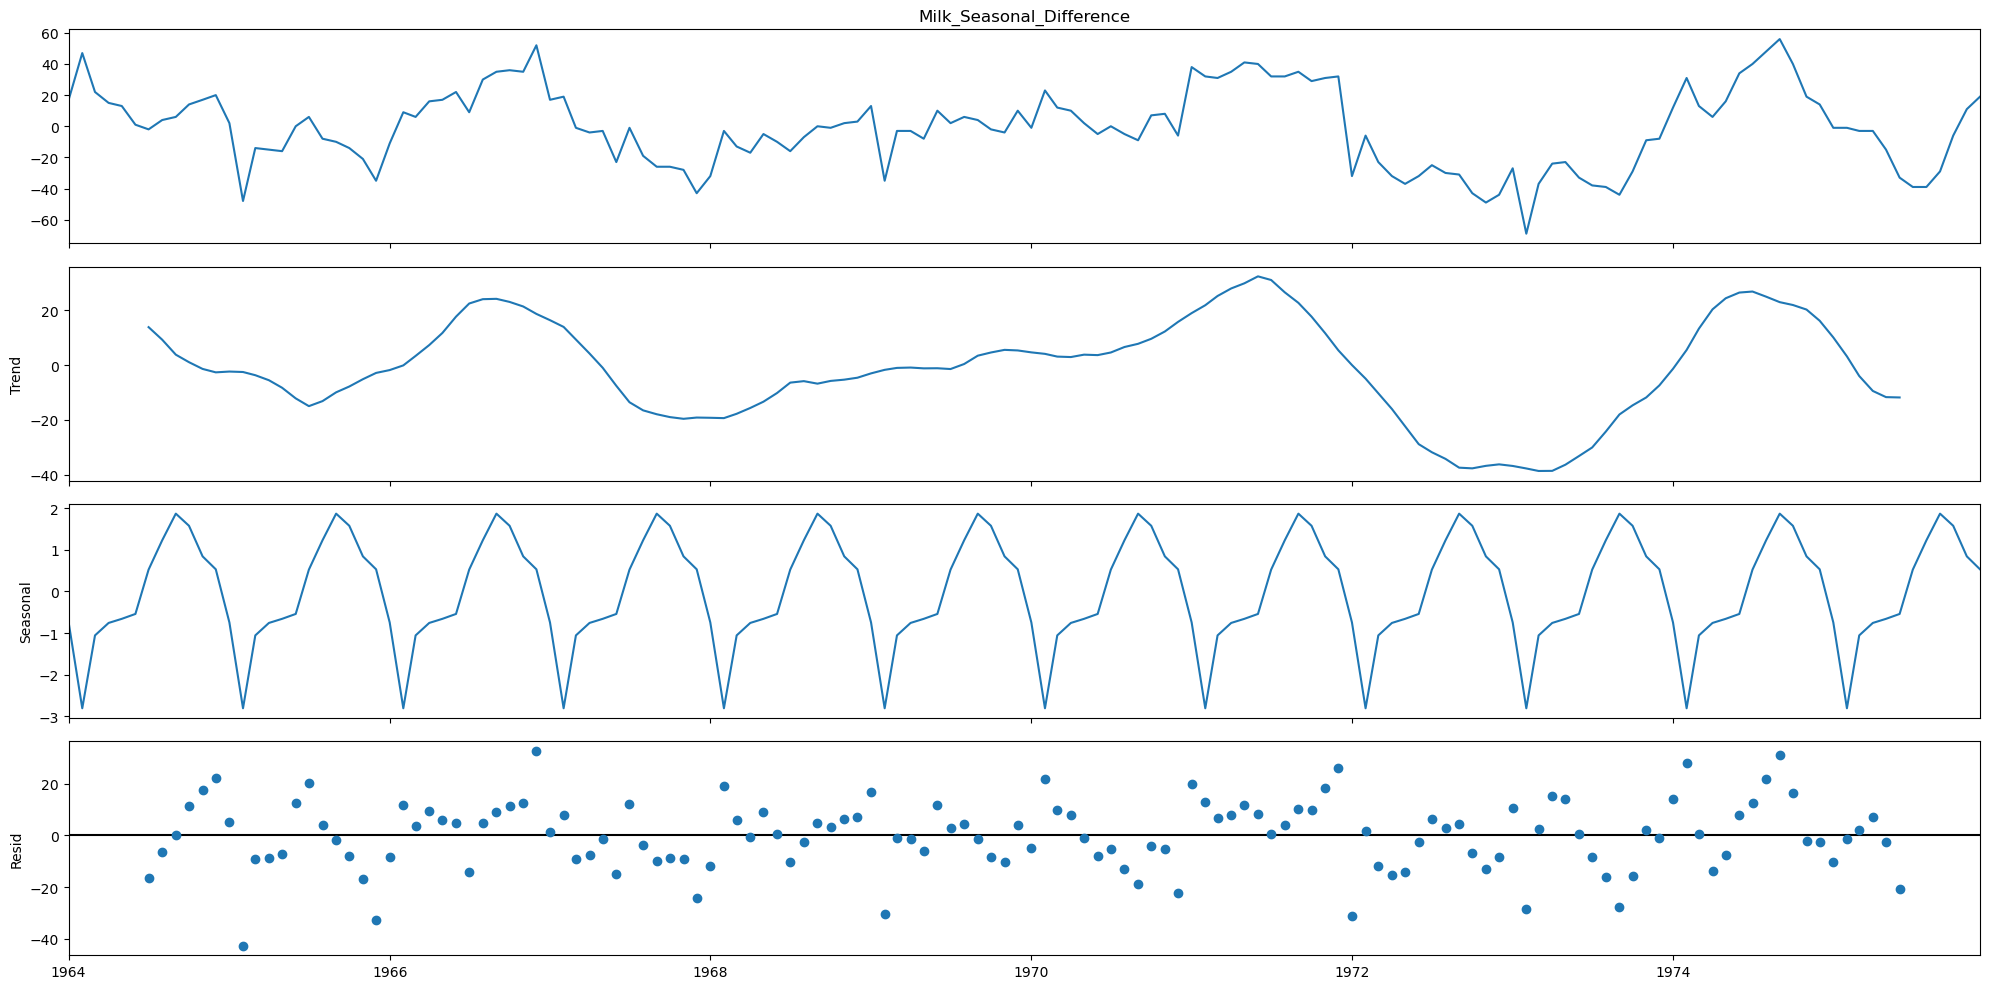

In [58]:
# Decompose Graph to check Trend and seasonality of 'Milk_Seasonal_First_Difference'

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(df['Milk_Seasonal_Difference'].dropna(),period=12)
fig=plt.figure()
fig=decomposition.plot()
plt.show()

In [59]:
# Display the Data Set

df.head(20)

,Milk Production,Milk_First_Difference,Milk_Seasonal_Difference,Milk_Seasonal_First_Difference
Month,,,,
1962-01-01,589.0,NaN,NaN,NaN
1962-02-01,561.0,-28.0,NaN,NaN
1962-03-01,640.0,79.0,NaN,NaN
1962-04-01,656.0,16.0,NaN,NaN
1962-05-01,727.0,71.0,NaN,NaN
1962-06-01,697.0,-30.0,NaN,NaN
1962-07-01,640.0,-57.0,NaN,NaN
1962-08-01,599.0,-41.0,NaN,NaN
1962-09-01,568.0,-31.0,NaN,NaN


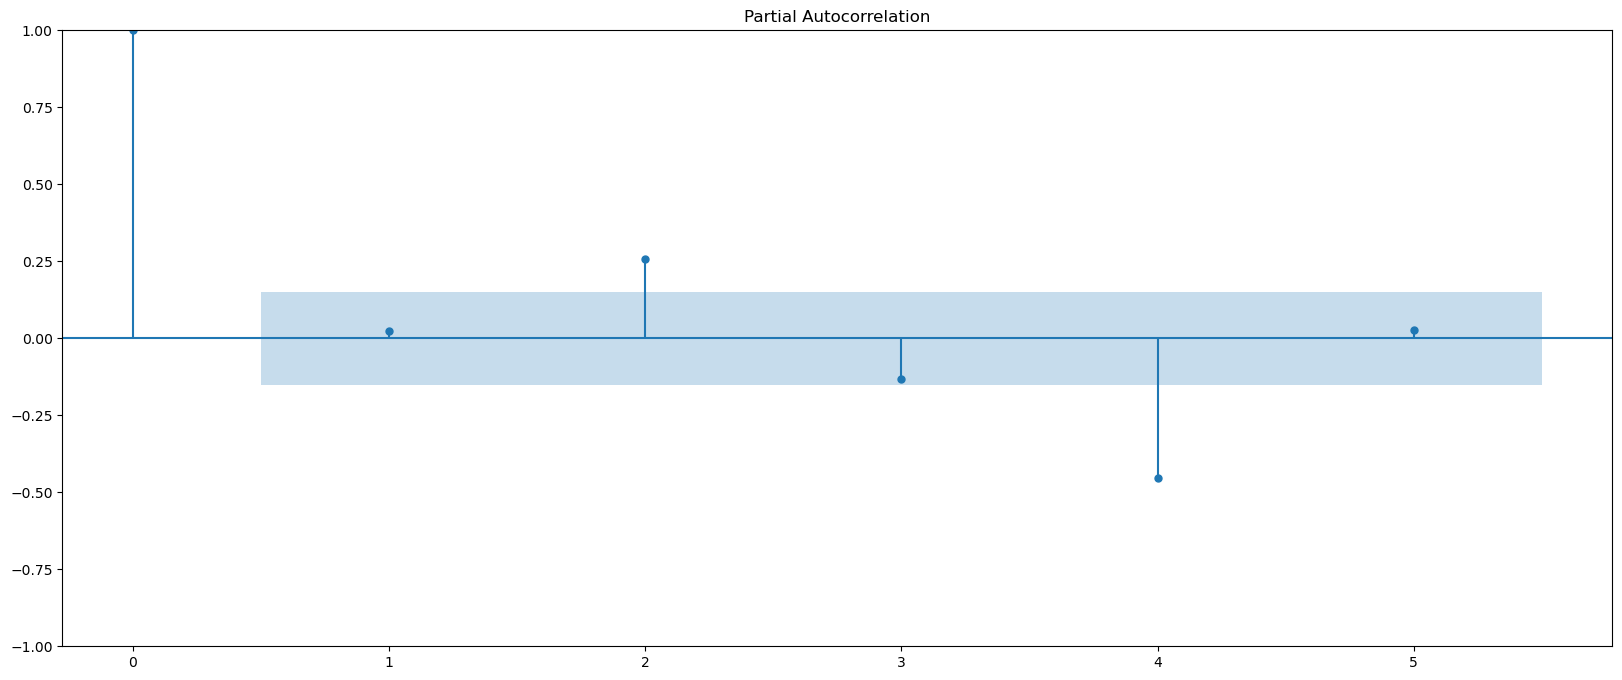

In [63]:
# PACF Check to find P value - Trend
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,8
fig=sm.graphics.tsa.plot_pacf(df['Milk_First_Difference'].iloc[1:],lags=5)

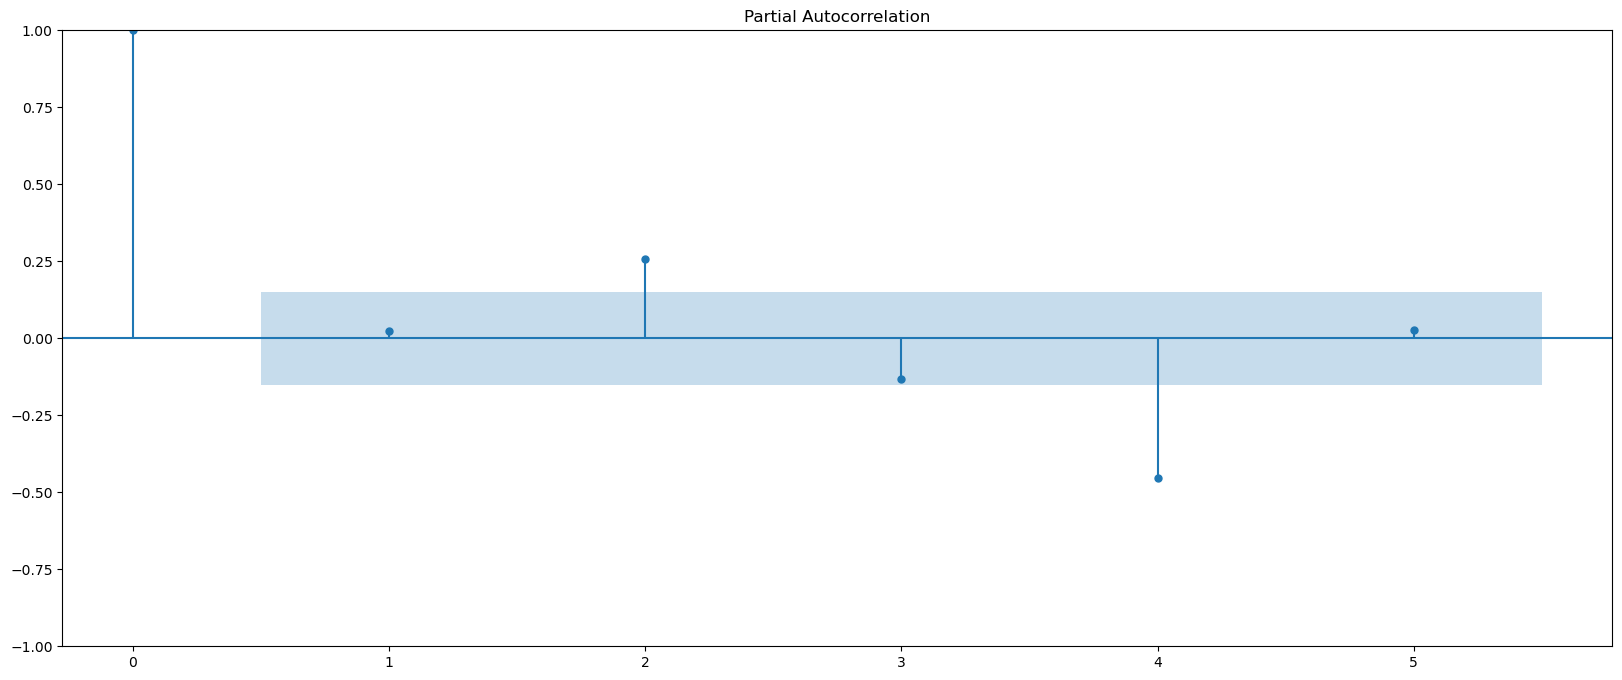

In [72]:
fig=sm.graphics.tsa.plot_pacf(df['Milk_First_Difference'].iloc[1:],lags=5)

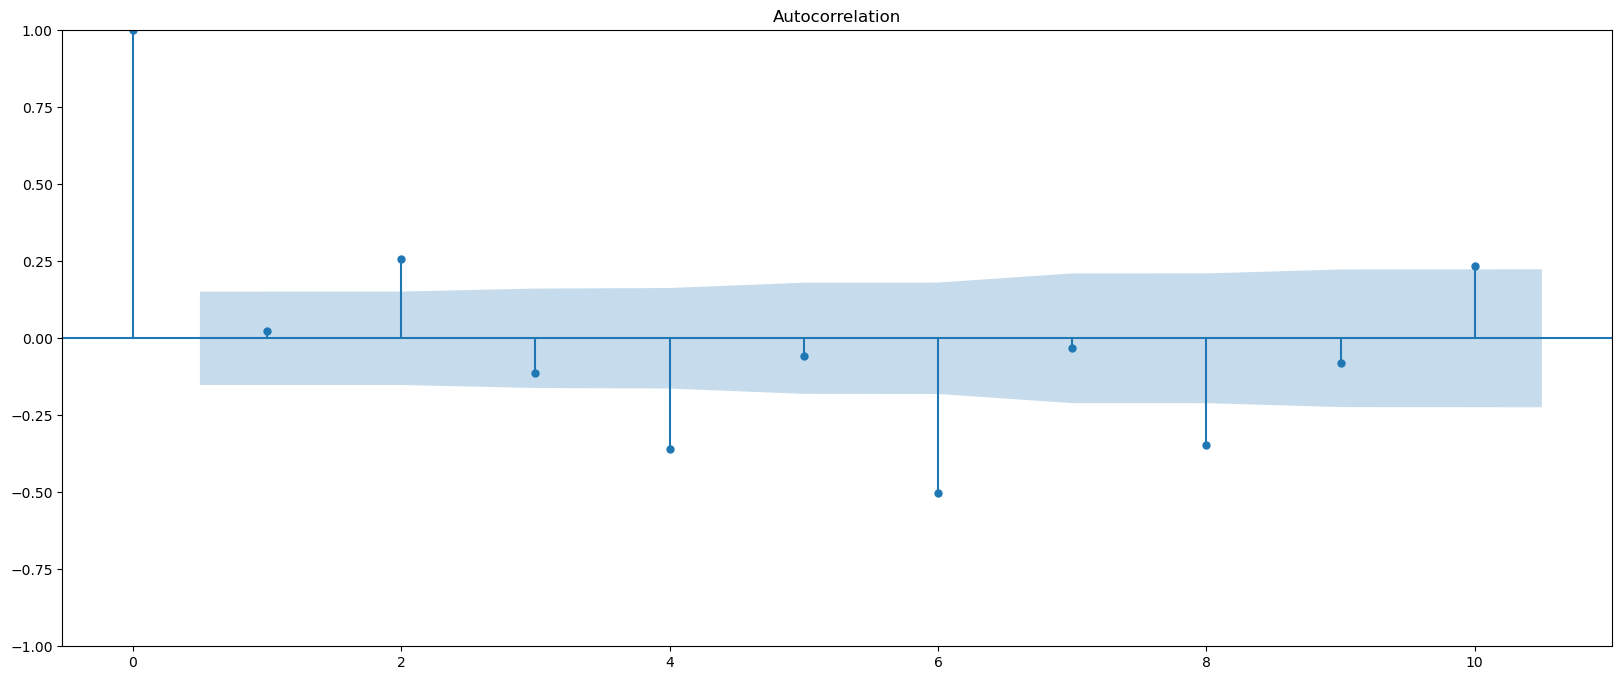

In [71]:
# ACF Check to find q value - Trend

fig=sm.graphics.tsa.plot_acf(df['Milk_First_Difference'].iloc[1:],lags=10)

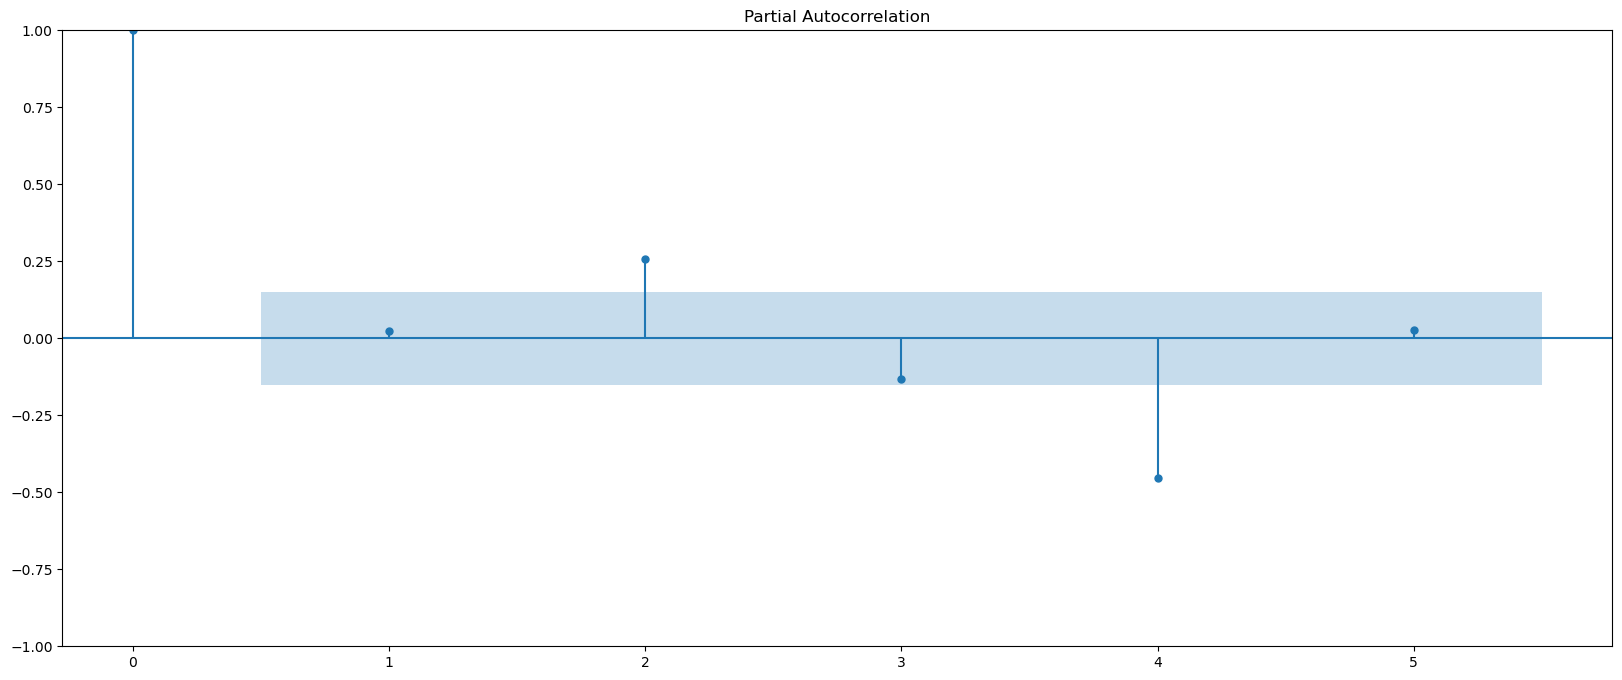

In [68]:
fig=sm.graphics.tsa.plot_pacf(df['Milk_First_Difference'].iloc[1:],lags=5)

In [69]:
df

,Milk Production,Milk_First_Difference,Milk_Seasonal_Difference,Milk_Seasonal_First_Difference
Month,,,,
1962-01-01,589.0,NaN,NaN,NaN
1962-02-01,561.0,-28.0,NaN,NaN
1962-03-01,640.0,79.0,NaN,NaN
1962-04-01,656.0,16.0,NaN,NaN
1962-05-01,727.0,71.0,NaN,NaN
...,...,...,...,...
1975-08-01,858.0,-38.0,-39.0,-87.0
1975-09-01,817.0,-41.0,-29.0,-85.0
1975-10-01,827.0,10.0,-6.0,-46.0


In [70]:
df['Milk_First_Difference'].iloc[1:]

Month
1962-02-01   -28.0
1962-03-01    79.0
1962-04-01    16.0
1962-05-01    71.0
1962-06-01   -30.0
              ... 
1975-08-01   -38.0
1975-09-01   -41.0
1975-10-01    10.0
1975-11-01   -30.0
1975-12-01    46.0
Name: Milk_First_Difference, Length: 167, dtype: float64

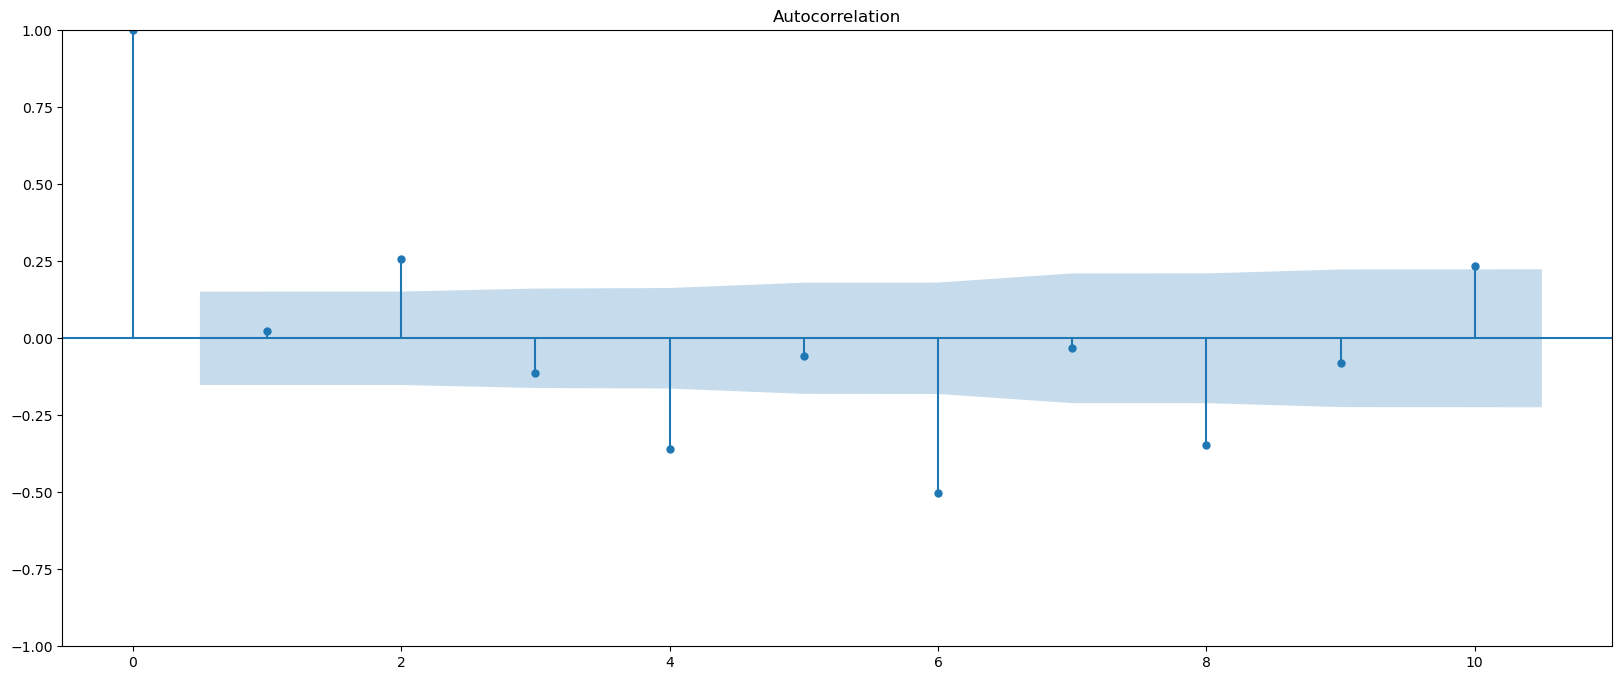

In [78]:
fig=sm.graphics.tsa.plot_acf(df['Milk_First_Difference'].iloc[1:],lags=10)

In [74]:
df.iloc[1]

Milk Production                   561.0
Milk_First_Difference             -28.0
Milk_Seasonal_Difference            NaN
Milk_Seasonal_First_Difference      NaN
Name: 1962-02-01 00:00:00, dtype: float64

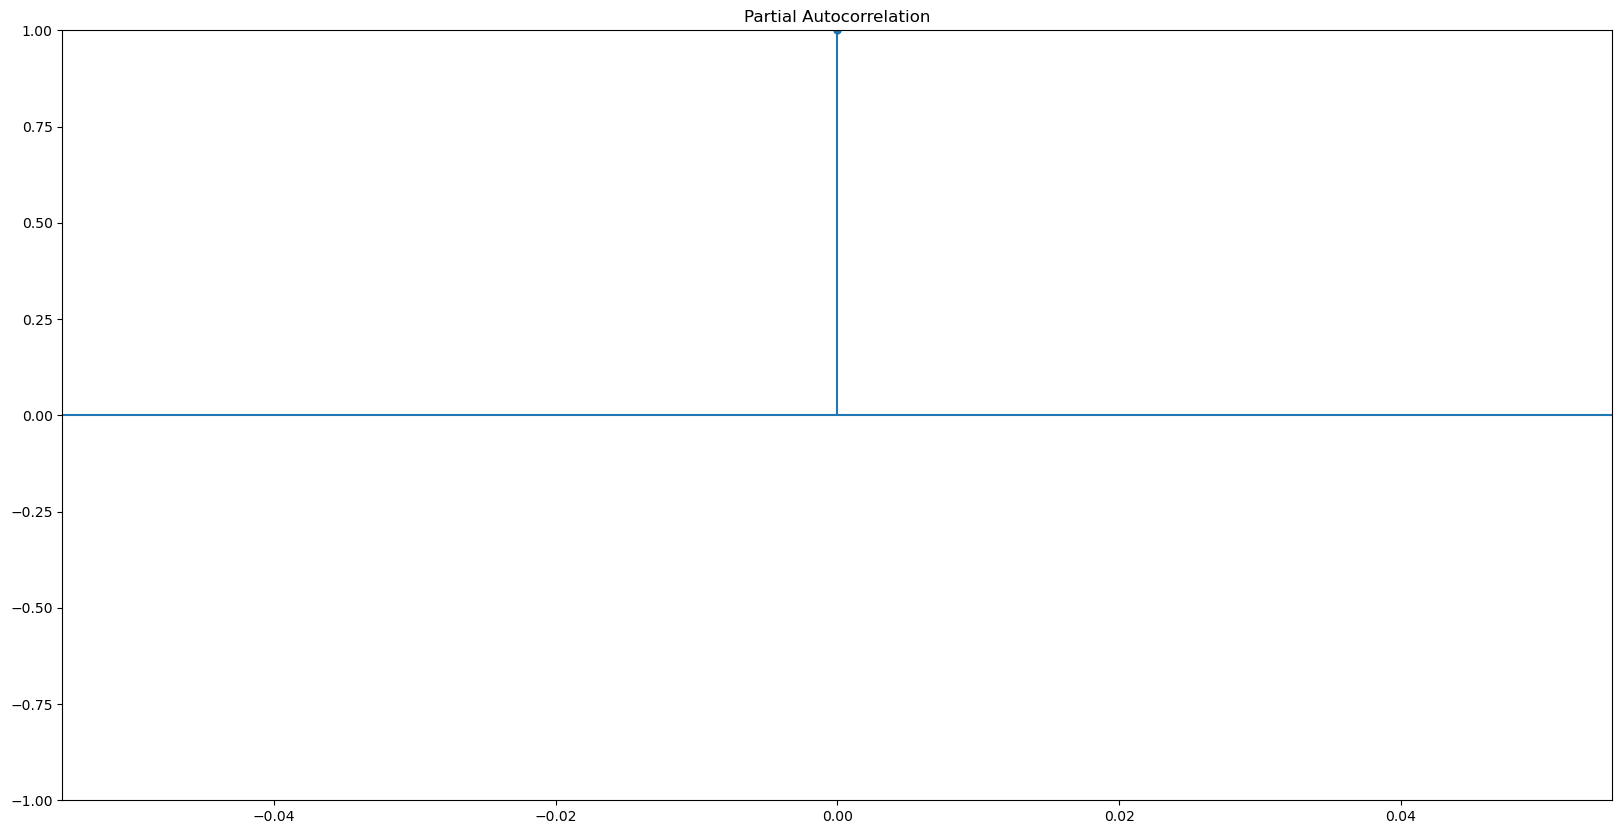

In [80]:
# PACF Check to find P value - Seasonal
rcParams['figure.figsize']=20,10
fig=sm.graphics.tsa.plot_pacf(df['Milk_Seasonal_First_Difference'].iloc[13:],lags=40)

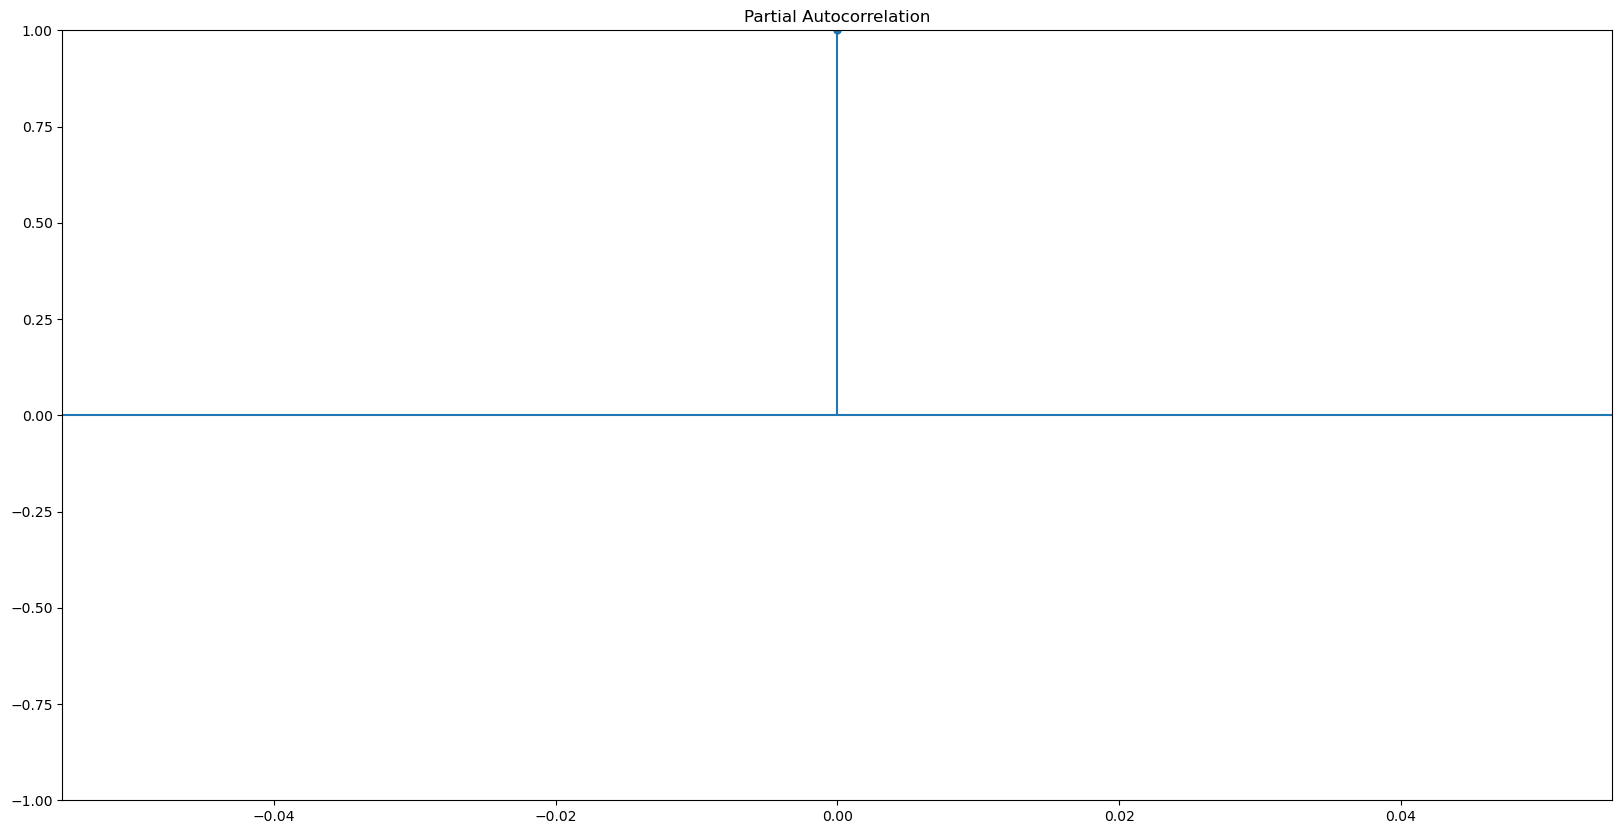

In [81]:
fig=sm.graphics.tsa.plot_pacf(df['Milk_Seasonal_First_Difference'].iloc[13:],lags=5)

c:\ProgramData\anaconda3\Lib\site-packages\matplotlib\axes\_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


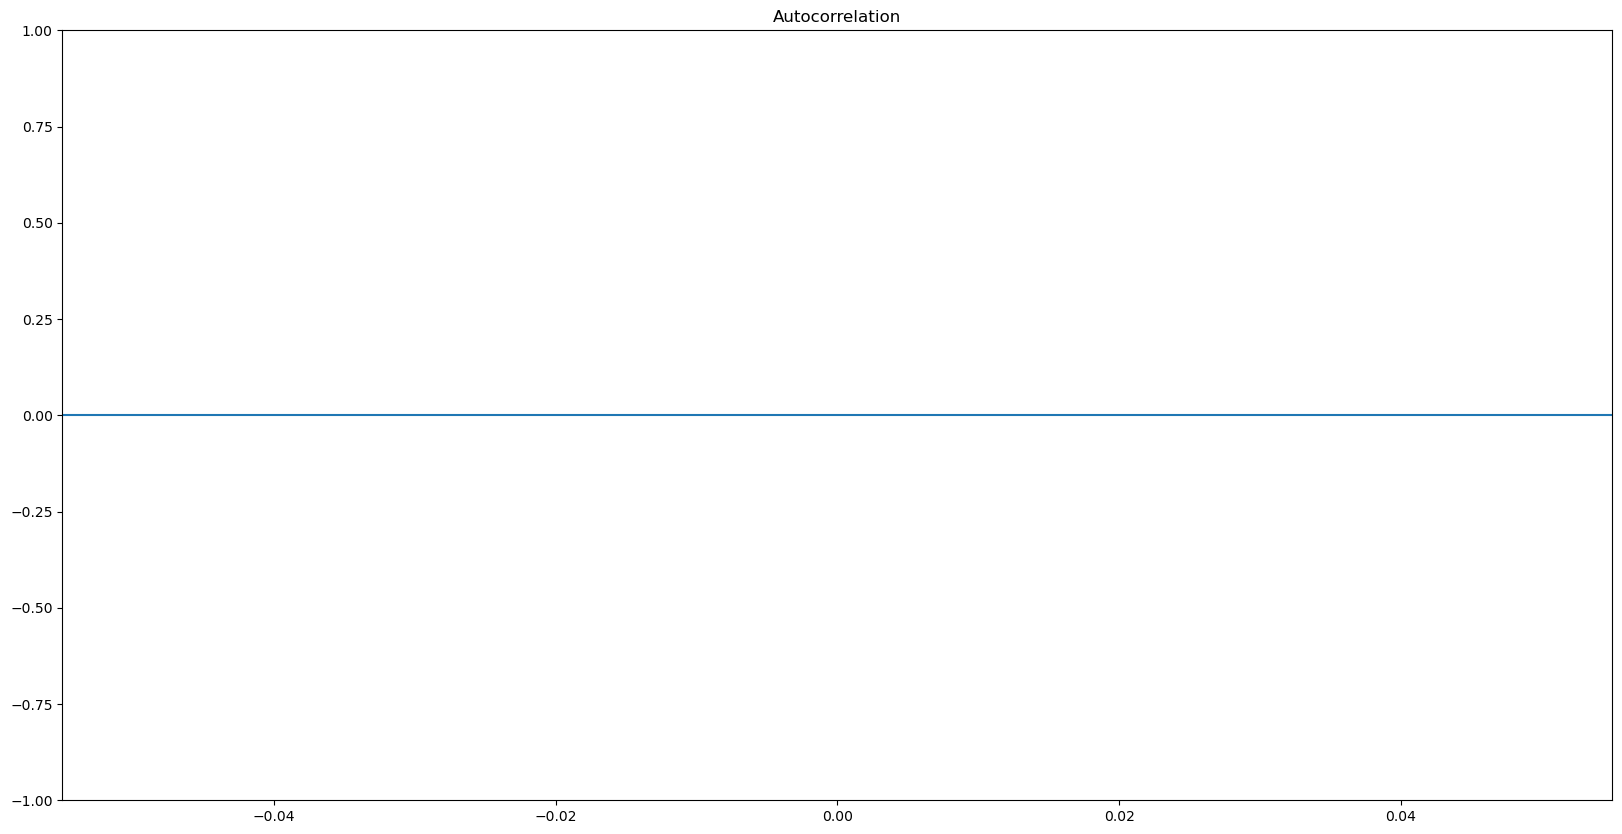

In [82]:
fig=sm.graphics.tsa.plot_acf(df['Milk_Seasonal_First_Difference'].iloc[13:],lags=5)

In [86]:
''' Create Model and Check AIC & BIC values, AIC & BIC values less than 750 is good Order = (p,d,q),
    seasoal_order (p,d,q),12(seasonality difference)'''
    
from statsmodels.tsa.arima.model import ARIMA
model = sm.tsa.statespace.SARIMAX(df['Milk Production'],order=(0,1,0),seasonal_order=(1,1,1,12)) 
results=model.fit()

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [87]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                      Milk Production   No. Observations:                  168
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -534.065
Date:                              Sat, 13 Jul 2024   AIC                           1074.131
Time:                                      10:32:59   BIC                           1083.261
Sample:                                  01-01-1962   HQIC                          1077.839
                                       - 12-01-1975                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0449      0.106     -0.422      0.673      -0.253       0.163
ma.S.L12      -0.5860      0.102     -5.762      0.000      -0.785      -0.387
sigma2        55.5118      5.356     10.365      0.000      45.015      66.009
===================================================================================
Ljung-Box (L1) (Q):                   8.13   Jarque-Bera (JB):                32.04
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.69   Skew:                             0.77
Prob(H) (two-sided):                  0.18   Kurtosis:                         4.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Accuracy 0.938330350351961
Month
1962-01-01      0.000000
1962-02-01    589.000000
1962-03-01    561.000000
1962-04-01    640.000000
1962-05-01    656.000000
                 ...    
1975-08-01    855.358648
1975-09-01    808.841372
1975-10-01    819.323185
1975-11-01    790.427530
1975-12-01    837.063622
Name: forecast, Length: 168, dtype: float64


,Milk Production,Milk_First_Difference,Milk_Seasonal_Difference,Milk_Seasonal_First_Difference,forecast
Month,,,,,
1962-01-01,589.0,NaN,NaN,NaN,0.000000
1962-02-01,561.0,-28.0,NaN,NaN,589.000000
1962-03-01,640.0,79.0,NaN,NaN,561.000000
1962-04-01,656.0,16.0,NaN,NaN,640.000000
1962-05-01,727.0,71.0,NaN,NaN,656.000000
...,...,...,...,...,...
1975-08-01,858.0,-38.0,-39.0,-87.0,855.358648
1975-09-01,817.0,-41.0,-29.0,-85.0,808.841372
1975-10-01,827.0,10.0,-6.0,-46.0,819.323185


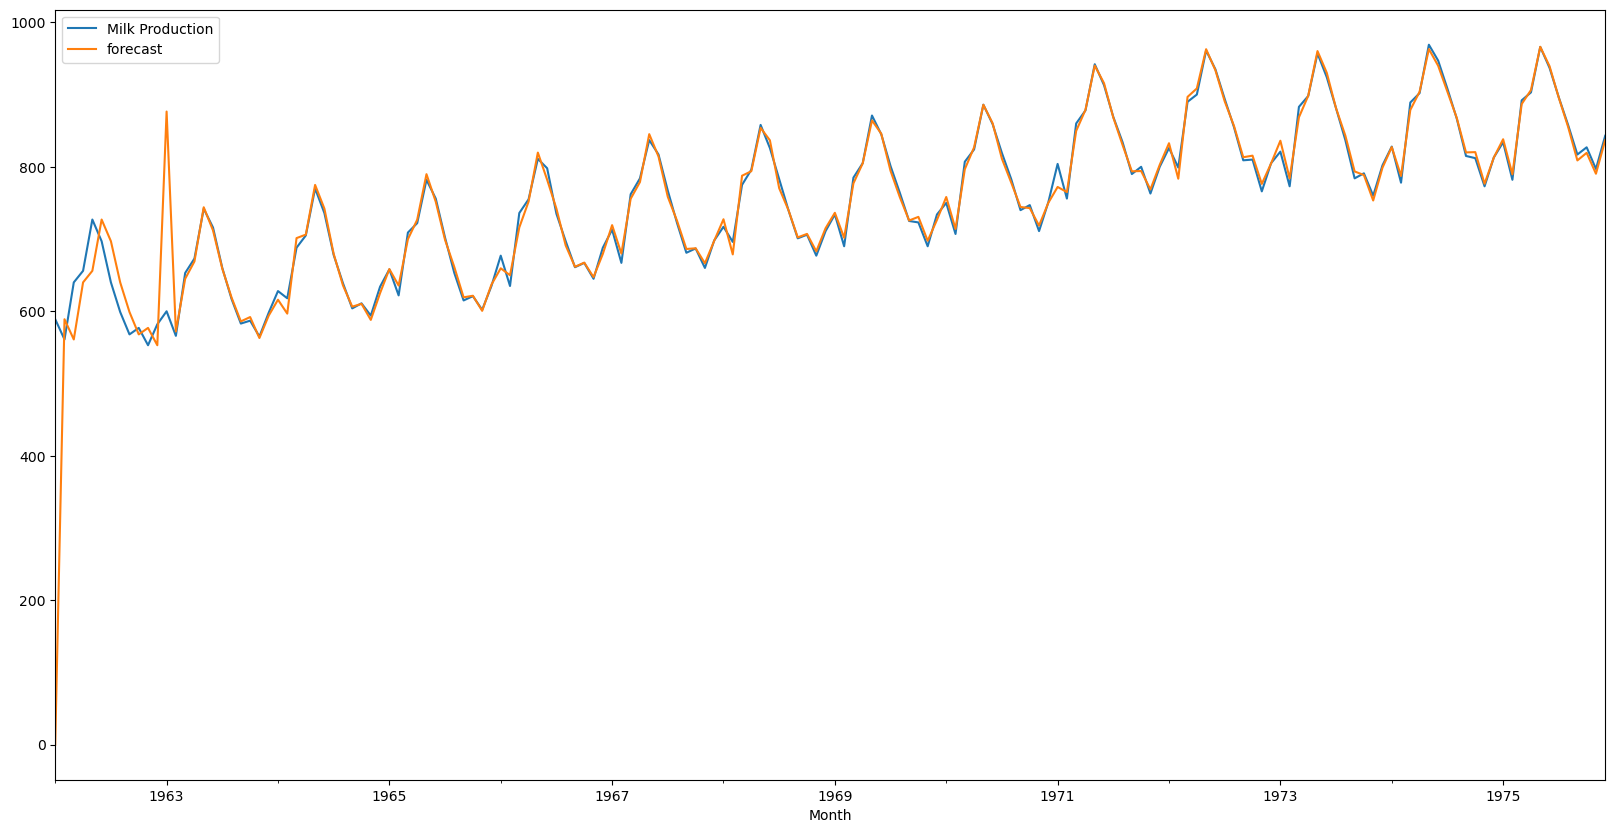

In [88]:
# Predict value for all record and save result in excel

df['forecast']=results.predict()
from sklearn.metrics import r2_score
print('Accuracy',r2_score(df['Milk Production'].iloc[1:],df['forecast'].iloc[1:]))
print(df['forecast'])
df[['Milk Production','forecast']].plot()
df.to_excel('prajwal data analyst.xlsx')
display(df)

Accuracy 0.9911213300420724


,Milk Production,Milk_First_Difference,Milk_Seasonal_Difference,Milk_Seasonal_First_Difference,forecast,forecast_test
Month,,,,,,
1962-01-01,589.0,NaN,NaN,NaN,0.000000,NaN
1962-02-01,561.0,-28.0,NaN,NaN,589.000000,NaN
1962-03-01,640.0,79.0,NaN,NaN,561.000000,NaN
1962-04-01,656.0,16.0,NaN,NaN,640.000000,NaN
1962-05-01,727.0,71.0,NaN,NaN,656.000000,NaN
...,...,...,...,...,...,...
1975-08-01,858.0,-38.0,-39.0,-87.0,855.358648,855.358648
1975-09-01,817.0,-41.0,-29.0,-85.0,808.841372,808.841372
1975-10-01,827.0,10.0,-6.0,-46.0,819.323185,819.323185


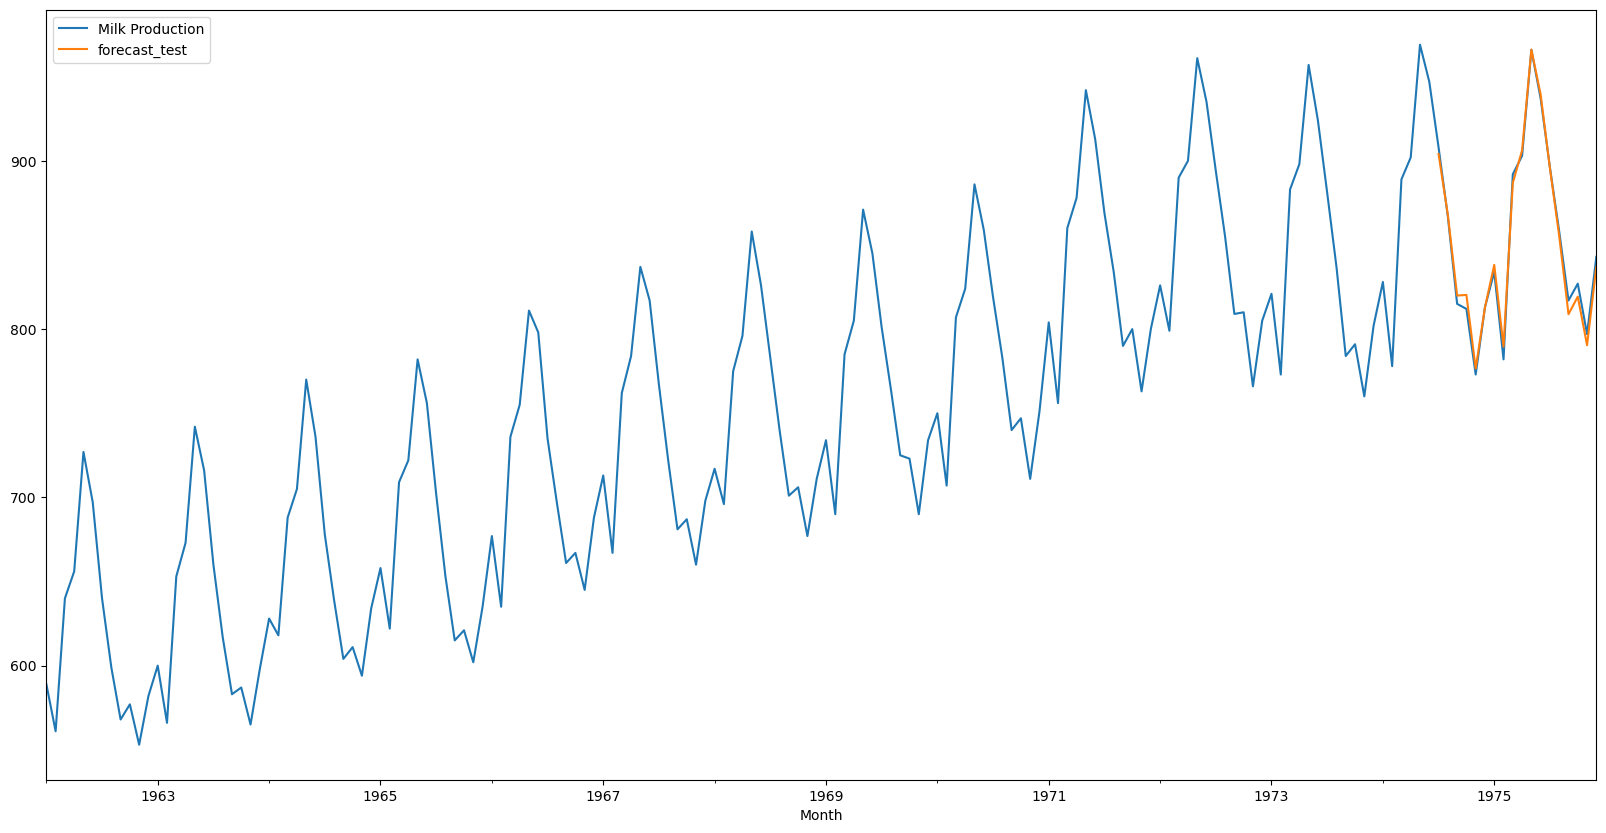

In [89]:
# Predict Value for test records

df['forecast_test']=results.predict(start=150,end=168)
print('Accuracy',r2_score(df['Milk Production']['1974-07-01':],df['forecast']['1974-07-01':]))
df[['Milk Production','forecast_test']].plot()
display(df)

In [92]:
# Predict for fFuture Values

'''Create future Dates'''

from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+DateOffset(months=x)for x in range (0,25)]
display(future_dates)

[Timestamp('1975-12-01 00:00:00'),
 Timestamp('1976-01-01 00:00:00'),
 Timestamp('1976-02-01 00:00:00'),
 Timestamp('1976-03-01 00:00:00'),
 Timestamp('1976-04-01 00:00:00'),
 Timestamp('1976-05-01 00:00:00'),
 Timestamp('1976-06-01 00:00:00'),
 Timestamp('1976-07-01 00:00:00'),
 Timestamp('1976-08-01 00:00:00'),
 Timestamp('1976-09-01 00:00:00'),
 Timestamp('1976-10-01 00:00:00'),
 Timestamp('1976-11-01 00:00:00'),
 Timestamp('1976-12-01 00:00:00'),
 Timestamp('1977-01-01 00:00:00'),
 Timestamp('1977-02-01 00:00:00'),
 Timestamp('1977-03-01 00:00:00'),
 Timestamp('1977-04-01 00:00:00'),
 Timestamp('1977-05-01 00:00:00'),
 Timestamp('1977-06-01 00:00:00'),
 Timestamp('1977-07-01 00:00:00'),
 Timestamp('1977-08-01 00:00:00'),
 Timestamp('1977-09-01 00:00:00'),
 Timestamp('1977-10-01 00:00:00'),
 Timestamp('1977-11-01 00:00:00'),
 Timestamp('1977-12-01 00:00:00')]

In [95]:
len(future_dates)

25

In [96]:
df

,Milk Production,Milk_First_Difference,Milk_Seasonal_Difference,Milk_Seasonal_First_Difference,forecast,forecast_test
Month,,,,,,
1962-01-01,589.0,NaN,NaN,NaN,0.000000,NaN
1962-02-01,561.0,-28.0,NaN,NaN,589.000000,NaN
1962-03-01,640.0,79.0,NaN,NaN,561.000000,NaN
1962-04-01,656.0,16.0,NaN,NaN,640.000000,NaN
1962-05-01,727.0,71.0,NaN,NaN,656.000000,NaN
...,...,...,...,...,...,...
1975-08-01,858.0,-38.0,-39.0,-87.0,855.358648,855.358648
1975-09-01,817.0,-41.0,-29.0,-85.0,808.841372,808.841372
1975-10-01,827.0,10.0,-6.0,-46.0,819.323185,819.323185


In [94]:
# Create Future Dates Frame,columns are same that of df

future_dates_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)
display(future_dates_df)

,Milk Production,Milk_First_Difference,Milk_Seasonal_Difference,Milk_Seasonal_First_Difference,forecast,forecast_test
1976-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-02-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-03-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-04-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-05-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-06-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-07-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-08-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-09-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-10-01,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
# Concat Future Dates and Dates. Future Dates will be added to the end.

future_df=pd.concat([df,future_dates_df]) 
display(future_df)

,Milk Production,Milk_First_Difference,Milk_Seasonal_Difference,Milk_Seasonal_First_Difference,forecast,forecast_test
1962-01-01,589.0,NaN,NaN,NaN,0.0,NaN
1962-02-01,561.0,-28.0,NaN,NaN,589.0,NaN
1962-03-01,640.0,79.0,NaN,NaN,561.0,NaN
1962-04-01,656.0,16.0,NaN,NaN,640.0,NaN
1962-05-01,727.0,71.0,NaN,NaN,656.0,NaN
...,...,...,...,...,...,...
1977-08-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-09-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-10-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-11-01,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
168+24

192

,Milk Production,Milk_First_Difference,Milk_Seasonal_Difference,Milk_Seasonal_First_Difference,forecast,forecast_test
1973-11-01,760.0,-31.0,-9.0,40.0,NaN,NaN
1973-12-01,802.0,42.0,-8.0,36.0,NaN,NaN
1974-01-01,828.0,26.0,12.0,39.0,NaN,NaN
1974-02-01,778.0,-50.0,31.0,100.0,NaN,NaN
1974-03-01,889.0,111.0,13.0,50.0,NaN,NaN
1974-04-01,902.0,13.0,6.0,30.0,NaN,NaN
1974-05-01,969.0,67.0,16.0,39.0,NaN,NaN
1974-06-01,947.0,-22.0,34.0,67.0,NaN,NaN
1974-07-01,908.0,-39.0,40.0,78.0,NaN,904.057179
1974-08-01,867.0,-41.0,48.0,87.0,NaN,867.841922


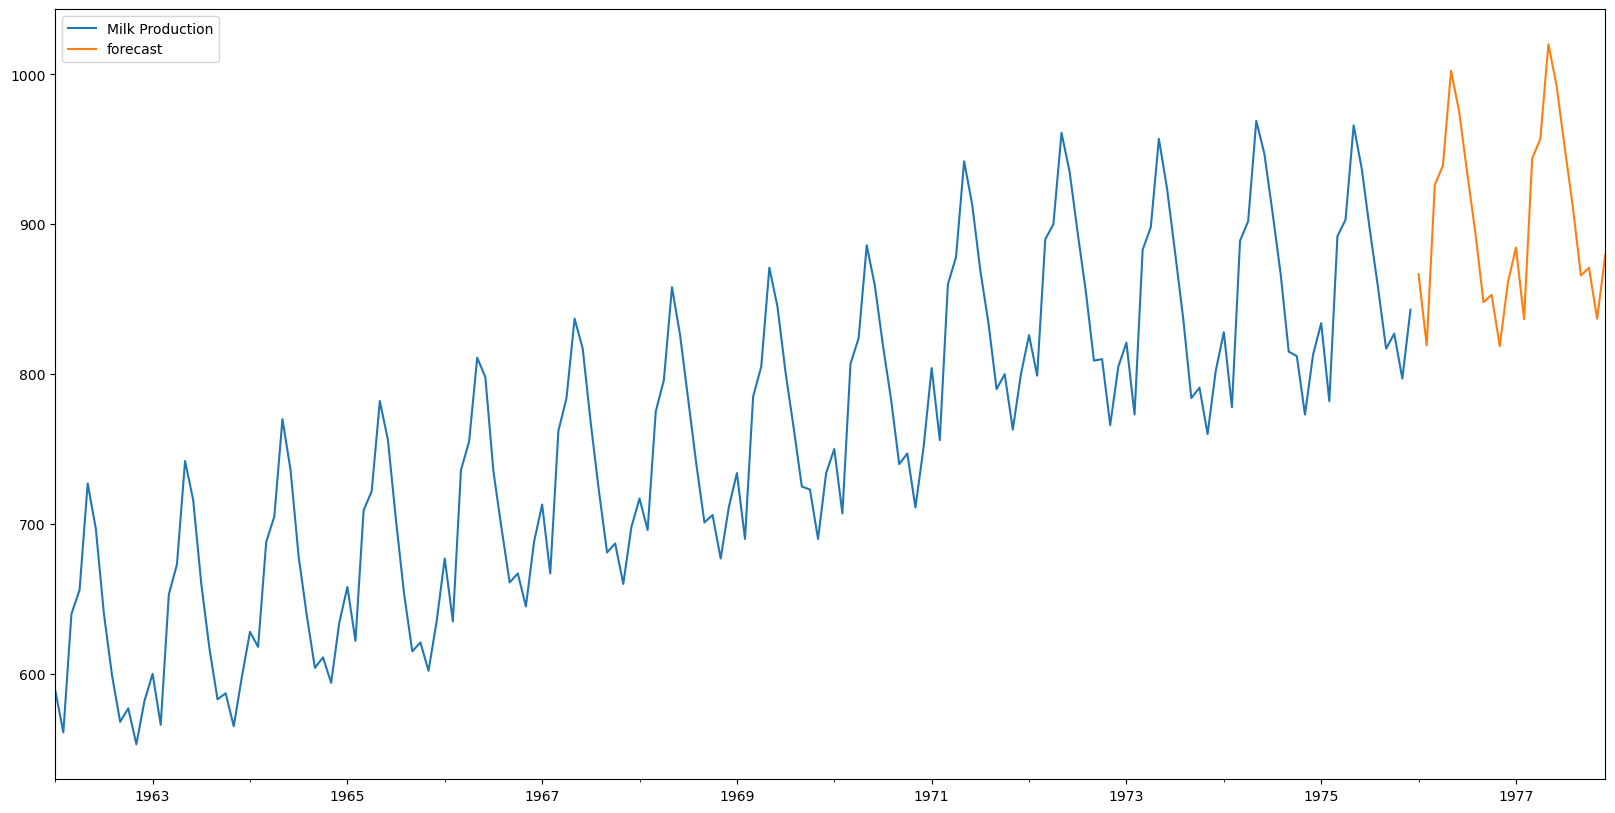

In [101]:
# Predict for Future Dates and save the result in excel

future_df['forecast']=result.predict(start=168,end=192)
future_df[['Milk Production','forecast']].plot(figsize=(20,10))
future_df.to_excel('prajwal data analyst future_milk_production.xlsx')
future_df.tail(50) 

In [102]:
'''OK Data Analyst 😄'''

'OK Data Analyst 😄'